<a href="https://colab.research.google.com/github/Kruglikle/EduText-Analyzer/blob/main/EduText_Analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


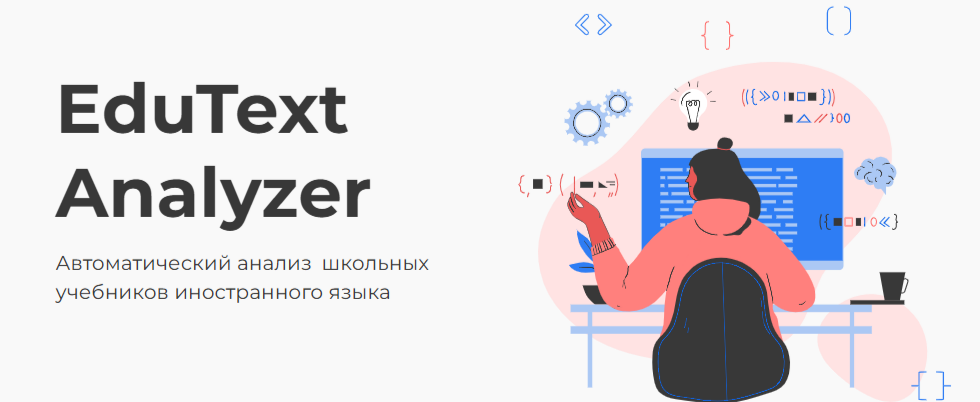




---



**Цель:**

Создать инструмент для автоматического анализа школьных учебников английского языка по следующим параметрам:

а) коммуникативная направленность упражнений

б) оценка лексики по языковому уровню CEFR

в) теггинг частей речи

г) частотный анализ рецептивной и продуктивно-рецептивной лексики



**1. Распределение по типу упражнений и по видам речевой деятельности**

In [ ]:
#импорты
import matplotlib.pyplot as plt
from collections import defaultdict
from IPython.display import display, HTML
from collections import defaultdict

In [ ]:
# Английский словарь — Категория по типу задания
category_keywords_en = {
    'языковые': [
        'read and complete', 'fill in', 'match', 'underline', 'put the words on',
        'choose the right tense', 'complete the sentences', 'fill in the blanks',
        'put the verbs in the correct form', 'use the correct form of the word',
        'match the words with their meanings', 'find the odd one out', 'sort the words',
        'put the words into', 'rewrite the sentences', 'correct the mistakes',
        'choose the correct answer', 'circle the correct option',
        'write the correct form', 'complete the table', 'find and correct',
        'make sentences using', 'put the sentences in order',
        'choose the word that does not belong', 'find the synonyms', 'find the antonyms',
        'form adjectives from nouns', 'complete the chart', 'write questions',
        'complete with the correct prepositions', 'identify the tense',
        'use the words in brackets', 'open the brackets', 'write the opposites',
        'choose the correct word', 'look, read and choose'
    ],
    'коммуникативные': [
        'make a dialogue', 'ask and answer', 'role-play', 'singing', 'say in',
        'ask questions using the prompts', 'complete and act out the dialogue',
        'work with your partner', 'say the sentences with the correct intonation',
        'read and act', 'make questions and answers',
        'speak', 'discuss', 'interview', 'describe',
        'talk about your day', 'describe your favourite', 'give a short talk',
        'share your opinion with the class', 'ask and answer freely',
        'prepare a short presentation', 'make up', 'tell a story',
        'talk to your classmate', 'write and present', 'speak about yourself',
        'create your own dialogue', 'talk about the picture', 'make a presentation',
        'prepare a speech', 'do a mini-project', 'write and act out a scene',
        'answer the questions orally', 'act out a conversation', ' talk about'
    ]
}



In [ ]:
# Английский словарь — ВРД
lrws_keywords_en = {
    'listening': [
        'listen', 'listening', 'hear', 'singing',
        'listen and tick', 'listen and colour', 'listen and draw',
        'listen and guess', 'listen to your friend'
    ],
    'reading': [
        'read', 'reading', 'read and say true or false',
        'read the story and answer', 'read and guess the meaning'
    ],
    'writing': [
        'write', 'writing', 'complete', 'fill in', 'underline',
        'write a short story', 'write about your day',
        'write a postcard', 'write a letter', 'write an email',
        'write your own sentences'
    ],
    'speaking': [
        'make a dialogue', 'ask and answer', 'talk', 'role-play', 'speak',
        'discuss', 'interview', 'describe', 'say',
        'retell the story', 'talk about your favourite',
        'prepare a short dialogue', 'describe the picture to your friend',
        'interview your classmate'
    ]
}

In [ ]:
# Русский словарь — Категория по типу задания
category_keywords = {
    'языковое': [
        'вставь', 'подчеркни', 'заполни', 'соедини',  'сделай из двух предложений одно',
        'выпиши', 'дополни', 'впиши', 'поставь слова',
        'перепиши', 'спой песенку', 'поиграем', "прослушай песенку и спой",
        'соотнеси слова с картинками', 'закончи предложения', 'вставляя слово',
        'вставь пропущенное слово', 'выбери нужный предлог',
        'повтори за диктором', 'выучи',
        'повтори слова', 'послушай и прочитай фразы', 'отметь галочкой',
        'назови предмет', 'слушай и повторяй за', 'найди лишнее слово', 'прочитай слова и совмести',
        'повтори', 'подбери правильные вопросы',
        'составь рифмовку с новыми словами',
        'послушай аудиозапись и повтори','сделай из двух предложений одно', 'вставь фразу', 'закончи эти фразы',
        'попробуй повторить рифмовку', 'угадай', "пронумеруй",
        'посмотри на рисунки и найди',
        'послушай рифмовку и повтори её за диктором', "распредели слова",
        'послушай и повтори', "послушай как по-английски", "повтори звуки и слова", "закончи эти фразы", 'закончи фразы',   'повтори движение', 'раскрась', 'изобрази', "спой песенку",
    'сделай табличку', 'сделай открытку', 'сделай маску'
    ],

    'коммуникативное': [
        'составь диалог', 'разыграй диалог', 'говорит, что он', 'друг другу вопрос', "назови",
        'ответь на вопросы', 'задай вопросы', 'продолжи диалог', 'поговори с одноклассником',
        'обсуди', 'закончи диалог', 'поиграй в роли', 'напиши (о чем)', "скажи",
        'скажи, кто это', 'расскажи, что ты видишь', 'научись отвечать',
        'опиши героя', 'опиши картинку', 'скажи, где находится', 'скажи, что у него есть',
        'расскажите, что изображено', 'назови их',
        'опиши своего персонажа', 'вспомни, что говорят', 'представьтесь друг другу',
        'угадай', 'опиши', 'скажи, что видишь', 'скажи, кто это',
        'опиши, как одет', 'вставь фразу', 'ответь на вопросы по сценке', "что ты можешь сказать",
        'назови по-английски', 'говорят', 'ответь на вопросы',
        'прочитай и составь', "посмотри на картинки и дай характеристики",
        'расскажи', 'поделись впечатлениями', 'представь себя', 'поговори о', 'придумай историю', 'расскажи о',
        'поприветствуй', 'поговори', 'скажи', 'расскажи, как провёл день', 'пожелай',
        'расскажи о празднике', 'напиши письмо', 'театральная сценка', 'сыграй роль',
        'поделись мечтой', 'расскажи о себе', 'выскажи своё мнение', 'расскажи о питомце', 'скажи, что ты хочешь',
        'пожелай на день рождения', 'пожелай',
        'предложи', 'убеди', 'опиши свою комнату', 'расскажи историю', 'закончи рифмовку', 'назови его',
        'пригласи друга', 'пожелай кому-то что-то', 'выскажи чувства',
        'разыграйте', 'назови того', 'прочитай эти слова и добавь', 'попращайся с', 'сыграйте в игру'
    ],

}

In [ ]:
# Русский словарь — ВРД
lrws_keywords_ru = {
    'listening': [
        'послушай', 'прослушай', 'услышь', 'послушай и выбери', 'послушай и отметь',
        'послушай и повтори', 'послушай и покажи', 'слушай'
    ],
    'reading': [
        'прочитай', 'прочитай и подчеркни', 'прочитай текст', 'прочитай и впиши'
    ],
    'writing': [
        'напиши', 'впиши', 'допиши', 'вставь слова', 'запиши слова', 'напиши письмо',
        'поприветствуй', 'поговори', 'скажи', 'перепиши'
    ],
    'speaking': [
        'расскажи', 'задай вопросы', 'побеседуй', 'поговори с другом',
        'составь диалог', 'опиши', 'ответь устно', 'обсуди', 'спой', 'повтори'
    ]
}



In [ ]:
# Объединяем словари по категориям
category_keywords = {}
for k in set(category_keywords_en.keys()).union(category_keywords_ru.keys()):
    category_keywords[k] = category_keywords_en.get(k, []) + category_keywords_ru.get(k, [])

# Объединяем словари по ВРД
lrws_keywords = {}
for k in set(lrws_keywords_en.keys()).union(lrws_keywords_ru.keys()):
    lrws_keywords[k] = lrws_keywords_en.get(k, []) + lrws_keywords_ru.get(k, [])


Предобработка учебников (nlp preprocessing)

На вход теперь поступает csv

Csv перед этим очищается. убираем оттуда все английские фразочки:3

In [ ]:
import pandas as pd
import re

# Чтение CSV
input_file = '/content/enjoy2uncl.csv'
df = pd.read_csv(input_file)

# Функция проверки наличия английских слов
def has_english(text):
    if pd.isna(text):
        return False
    # Проверяем наличие латинских букв
    return bool(re.search(r'[a-zA-Z]', text))

# Фильтруем строки без английских слов
df_clean = df[~df['text'].apply(has_english)].copy()

# Сохраняем очищенный CSV
output_file = '/content/enjoy2_clean.csv'
df_clean.to_csv(output_file, index=False, encoding='utf-8-sig')

print(f"Исходных строк: {len(df)}, после очистки: {len(df_clean)}")


Исходных строк: 801, после очистки: 186


In [ ]:
import pandas as pd
from collections import defaultdict

# Словарь ключевых слов по типу упражнения
# category_keywords = {
#     'языковое': [...],
#     'коммуникативное': [...]
# }

# Счётчик для статистики
category_counts = defaultdict(int)

# Функция классификации
def classify_exercise(text_line, keyword_dict):
    text_line = str(text_line).lower()
    for category, keywords in keyword_dict.items():
        for keyword in keywords:
            if keyword.lower() in text_line:
                return category
    return 'unclassified'

# Чтение CSV
input_file = '/content/test-enjoy-2-standard.csv'  # CSV с колонкой 'text'
df = pd.read_csv(input_file)

classified_data = []

for idx, row in df.iterrows():
    text_line = row['text']

    # Категория
    category = classify_exercise(text_line, category_keywords)

    # Счётчик
    category_counts[category] += 1

    # Добавляем в итоговую таблицу
    classified_data.append({
        'text': text_line,
        'label': category
    })

# Сохраняем классифицированные данные
df_classified = pd.DataFrame(classified_data)
df_classified.to_csv('/content/enjoy-rulebased.csv', index=False, encoding='utf-8-sig')

# Отображение первых строк и статистики
display(df_classified.head(10))
print("Category counts:", dict(category_counts))


,text,label
0,"послушай и найди на картинке артистов, которые...",unclassified
1,"послушай и повтори, как знакомятся с артисты",языковое
2,разыграйте с одноклассником,коммуникативное
3,послушай и повтори названия профессий,языковое
4,"назови и сосчитай артистов, которые пришли на ...",коммуникативное
5,объяви выход артистов,unclassified
6,"догадайся, какие цифры спрятались назови прави...",коммуникативное
7,"послушай и повтори вопросы тома, на которые от...",языковое
8,"скажи, кто ты, как тебя зовут и сколько тебе лет",коммуникативное
9,узнай у артистов,unclassified


Category counts: {'unclassified': 23, 'языковое': 19, 'коммуникативное': 48}


In [ ]:
import re
import difflib
from collections import Counter

def merge_split_words(text):
    return re.sub(r'(\w+)-\s+(\w+)', r'\1\2', text)

def clean_text(text):
    text = re.sub(r'\s+', ' ', text)   # заменяем все подряд идущие пробелы/табуляции/переводы строки на один пробел
    text = re.sub(r'[^\w\s]', '', text)  # удаляем всё, что не буква/цифра/подчёркивание и не пробел
    return text.strip()   # убираем пробелы в начале и в конце текста

def preprocess_russian(text):
    text = text.lower()
    text = merge_split_words(text)
    text = clean_text(text)
    return text

def auto_correct_corpus(exercises, freq_cutoff=2, similarity_cutoff=0.8):
    # Считаем частоту слов
    all_words = [w for ex in exercises for w in ex.split()]
    counter = Counter(all_words)

    # Разделяем слова на "частые" и "редкие"
    frequent_words = [w for w, c in counter.items() if c >= freq_cutoff]
    corrected_exercises = []

    for ex in exercises:
        corrected_words = []
        for w in ex.split():
            if counter[w] < freq_cutoff:
                # ищем ближайшее частое слово
                matches = difflib.get_close_matches(w, frequent_words, n=1, cutoff=similarity_cutoff)
                corrected_words.append(matches[0] if matches else w)
            else:
                corrected_words.append(w)
        corrected_exercises.append(' '.join(corrected_words))

    return corrected_exercises

# Чтение, препроцессинг и автокоррекция
def load_and_preprocess_txt(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        raw_text = f.read()

    exercises = [ex for ex in raw_text.split('\n\n') if ex.strip()]
    exercises = [preprocess_russian(ex) for ex in exercises]
    exercises = auto_correct_corpus(exercises)

    return exercises

# Сохранение обработанных упражнений в новый файл
def save_to_txt(exercises, output_path):
    with open(output_path, 'w', encoding='utf-8') as f:
        f.write('\n\n'.join(exercises))

# Пример использования
file_path = 'starlight2.txt'
processed_exercises = load_and_preprocess_txt(file_path)

output_path = 'starlight2_cleaned.txt'
save_to_txt(processed_exercises, output_path)

print(f'Обработанные упражнения сохранены в {output_path}')


Обработанные упражнения сохранены в starlight2_cleaned.txt


In [ ]:
import pandas as pd
from collections import defaultdict

# Словари уже должны быть созданы: category_keywords, lrws_keywords

# Счётчики
category_counts = defaultdict(int)
lrws_counts = defaultdict(int)

# Списки для данных
classified_data = []
unclassified_data = []

# Функция классификации
def classify_exercise(text_line, keyword_dict):
    text_line = text_line.lower()
    for category, keywords in keyword_dict.items():
        for keyword in keywords:
            if keyword in text_line:
                return category
    return 'unclassified'

# Обработка файла
with open('/content/spotlight2.txt', 'r', encoding='utf-8') as file:
    for line in file:
        line = line.strip()
        if not line:
            continue

        # Категория (по типу задания)
        category = classify_exercise(line, category_keywords)

        # ВРД
        lrws_category = classify_exercise(line, lrws_keywords)

        # Классифицированные
        if category != 'unclassified' or lrws_category != 'unclassified':
            if category != 'unclassified':
                category_counts[category] += 1
            if lrws_category != 'unclassified':
                lrws_counts[lrws_category] += 1

            classified_data.append({
                'Упражнение': line,
                'Тип задания': category,
                'ВРД': lrws_category
            })
        else:
            # Неклассифицированные
            unclassified_data.append({'Упражнение': line})

# Сохраняем классифицированные
df_classified = pd.DataFrame(classified_data)
df_classified.to_csv('/content/kuzovlev3_classified_exercises.csv', index=False, encoding='utf-8-sig')

# Сохраняем неклассифицированные
df_unclassified = pd.DataFrame(unclassified_data)
df_unclassified.to_csv('/content/kuzovlev3_unclassified_exercises.csv', index=False, encoding='utf-8-sig')

# Отображение первых строк
display(df_classified.head(10))
display(df_unclassified.head(10))


FileNotFoundError: [Errno 2] No such file or directory: '/content/spotlight2.txt'

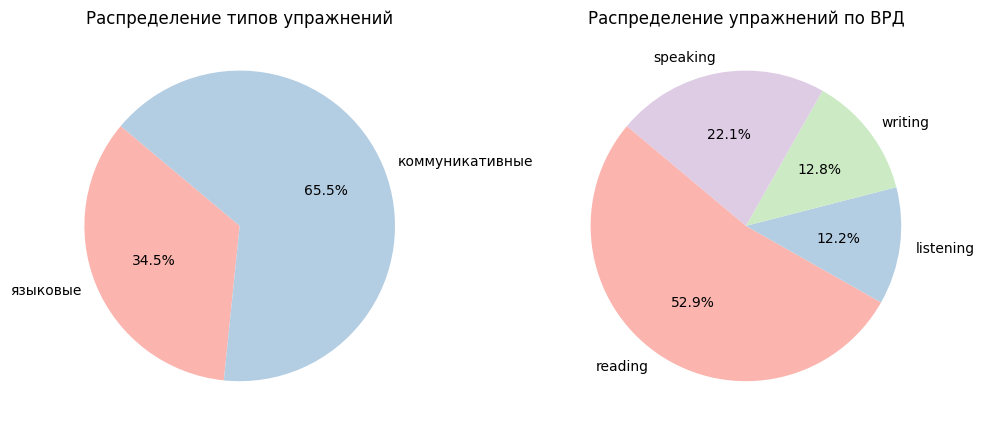


Распределение типов упражнений:
Языковые: 10
Коммуникативные: 19

Распределение упражнений по ВРД:
Reading: 91
Listening: 21
Writing: 22
Speaking: 38


NameError: name 'unclassified_exercises' is not defined

In [ ]:
# Заголовок
text = "Учебник Кузовлев 3 класс"

# Визуализация
plt.figure(figsize=(10, 6))


#Удаляем Unclassified из диаграммы
category_counts.pop('unclassified', None)
lrws_counts.pop('unclassified', None)

# Категории
plt.subplot(1, 2, 1)
plt.pie(category_counts.values(), labels=category_counts.keys(), autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title('Распределение типов упражнений')

# ВРД
plt.subplot(1, 2, 2)
plt.pie(lrws_counts.values(), labels=lrws_counts.keys(), autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title('Распределение упражнений по ВРД')

plt.tight_layout()
plt.show()

# Статистика
print("\nРаспределение типов упражнений:")
for category in category_counts:
    print(f"{category.capitalize()}: {category_counts[category]}")

print("\nРаспределение упражнений по ВРД:")
for category in lrws_counts:
    print(f"{category.capitalize()}: {lrws_counts[category]}")

print(f"\nКоличество нераспознанного материала: {len(unclassified_exercises)}")

print("\nUnclassified (не классифицировано):")
for i, ex in enumerate(unclassified_exercises[:10], 1):
    print(f"{i}. {ex}")

**Для наглядного сопоставления учебников, рекомендуется использование круговых диаграмм:**

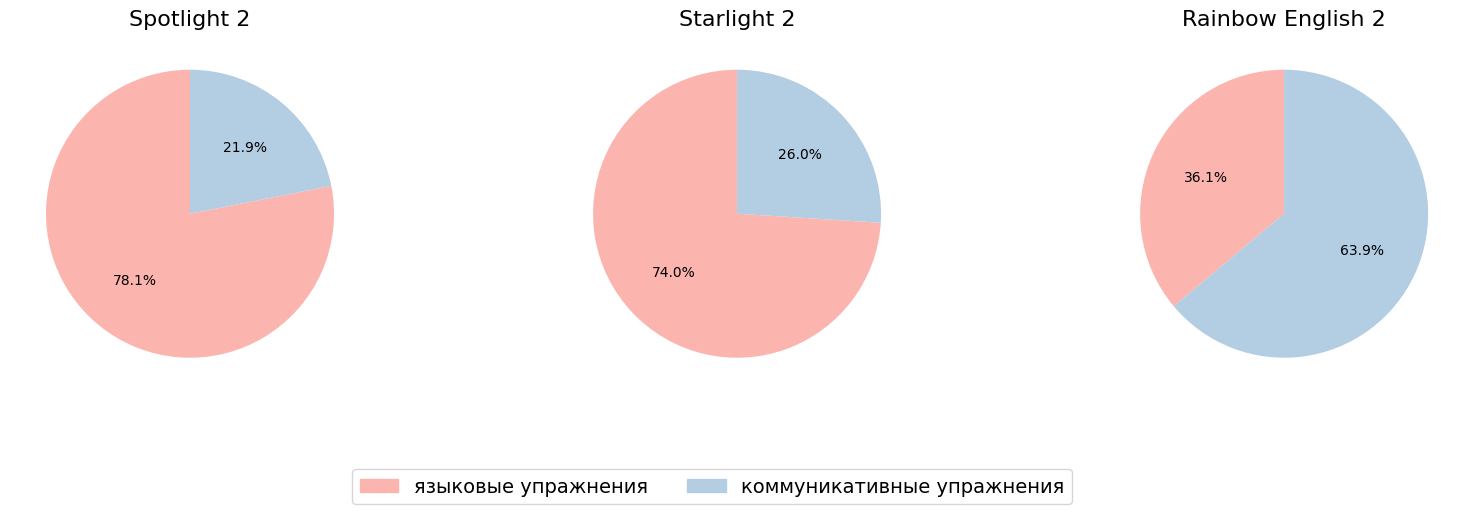

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Данные
data = {
    'Spotlight 2': [78.1, 21.9],
    'Starlight 2': [74, 26],
    'Rainbow English 2': [36.1, 63.9],
    "lklklk": []
}

# Категории и цвета из Pastel1
categories = ['языковые упражнения', 'коммуникативные упражнения']
colors = plt.cm.Pastel1.colors[:2]  # берём первые два цвета из Pastel1

# Создаём фигуру с тремя подграфиками
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# Строим круговые диаграммы
for ax, (textbook, values) in zip(axs, data.items()):
    ax.pie(values, autopct='%1.1f%%', colors=colors, startangle=90)
    ax.set_title(textbook, fontsize=16)

# Создаём патчи для легенды с цветами из Pastel1
patches = [mpatches.Patch(color=col, label=f'{cat}') for cat, col in zip(categories, colors)]

# Добавляем легенду под диаграммами, по центру, шрифт крупный

fig.legend(handles=patches, loc='lower center', ncol=2, fontsize=14, bbox_to_anchor=(0.5, 0.05))


# Регулируем отступы, чтобы легенда не перекрывала диаграммы
plt.subplots_adjust(bottom=0.25, top=0.85)

plt.show()

**Для количественного представления - таблица**

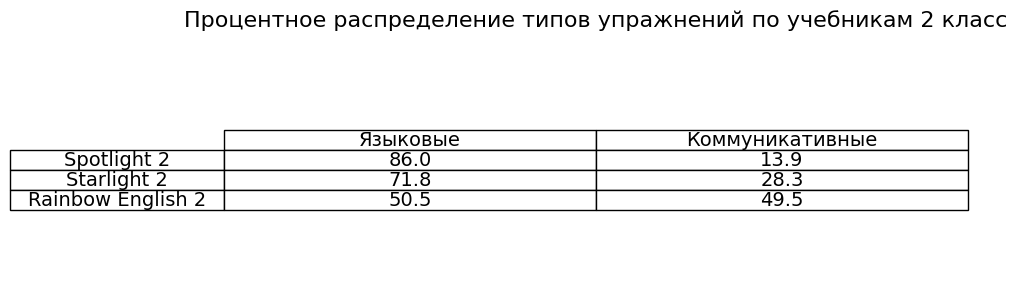

In [ ]:
#таблица
import matplotlib.pyplot as plt
import pandas as pd

# Данные
labels = ['Языковые', 'Коммуникативные']
data = {
    'Spotlight 2': [86, 13.9],
    'Starlight 2': [71.8, 28.3],
    'Rainbow English 2': [50.5, 49.5]
}

# Создаем DataFrame для таблицы
df = pd.DataFrame(data, index=labels).T  # транспонируем, чтобы учебники были по строкам

# Рисуем пустую фигуру и добавляем таблицу
fig, ax = plt.subplots(figsize=(8, 3))
ax.axis('off')  # скрываем оси

table = ax.table(cellText=df.round(1).values,
                 colLabels=df.columns,
                 rowLabels=df.index,
                 cellLoc='center',
                 rowLoc='center',
                 loc='center')

table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1.2, 1.2)

ax.set_title('Процентное распределение типов упражнений по учебникам 2 класс', fontsize=16, pad=20)

plt.show()


**Подкатегории язковых упражнений с учетом их фонетической, грамматической и лексической ценности. Только для 2 класса!! (when задания в учебнике еще на русском)**

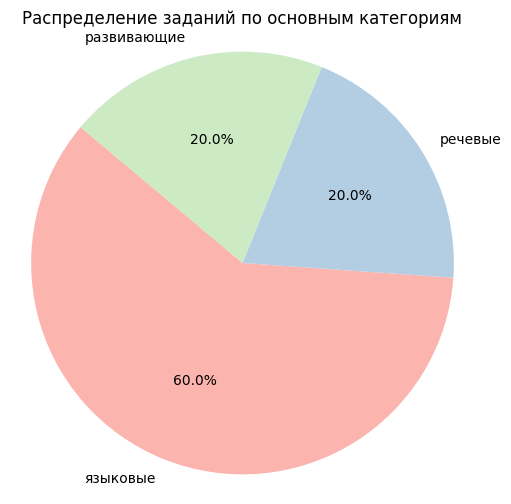

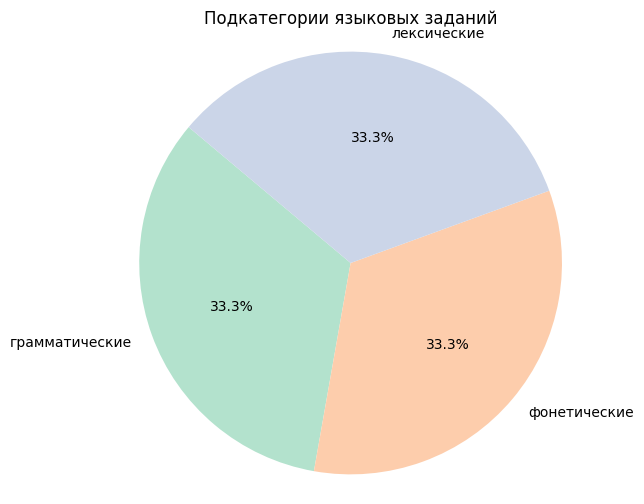

In [ ]:
import matplotlib.pyplot as plt
from collections import defaultdict
import pandas as pd

# Пример словаря категорий
category_keywords_ru = {
    'языковые': {
        'фонетические': [
            'повтори за диктором', 'спой песенку', 'повтори звуки', 'слушай и повторяй',
            'послушай и повтори', 'повтори слова', 'повтори движение', 'послушай рифмовку и повтори её за диктором',
            'послушай песенку и спой'
        ],
        'грамматические': [
            'вставь', 'подчеркни', 'заполни', 'соедини', 'сделай из двух предложений одно',
            'выпиши', 'дополни', 'впиши', 'поставь слова', 'перепиши',
            'выбери правильный ответ', 'найди соответствующие картинки', 'соотнеси слова с картинками',
            'закончи предложения', 'вставляя слово', 'вставь пропущенное слово',
            'выбери нужный предлог', 'подбери соответствующие картинки', 'составь слова', 'вставь фразу', 'закончи эти фразы'
        ],
        'лексические': [
            'выучи', 'назови предмет', 'найди лишнее слово', 'угадай', 'составь рифмовку с новыми словами',
            'прочитай и составь', 'назови по-английски'
        ]
    },
    'речевые': [
        'выскажи своё мнение', 'выскажи чувства', 'диалог', 'напиши', 'напиши письмо', 'назови того',
        'научись отвечать', 'обсуди', 'опиши', 'опиши героя', 'опиши картинку',
        'опиши своего персонажа', 'опиши свою комнату', 'опиши, как одет', 'ответь на вопросы',
        'ответь на вопросы по сценке', 'поговори', 'поговори с одноклассником', 'поговори о',
        'поделись впечатлениями', 'поделись мечтой', 'пожелай', 'пожелай кому-то что-то',
        'пожелай на день рождения', 'поиграй в роли', 'посмотри на картинки и дай характеристики',
        'предложи', 'представь себя', 'придумай историю', 'прочитай и напиши',
        'продолжи диалог', 'пригласи друга', 'разыграй диалог', 'разыграйте', 'расскажи',
        'расскажи историю', 'расскажи о', 'расскажи о празднике', 'расскажи о питомце',
        'расскажи о себе'
    ],
    'развивающие': [
        'давай поиграем', 'давай сделаем', 'изобрази', 'обведи',
        'повтори движение', 'прослушай песенку и спой', 'раскрась',
        'сделай маску', 'сделай открытку', 'сделай табличку', 'сыграйте в игру'
    ]
}

# Пример входных данных (задания)
tasks = [
    'вставь', 'повтори за диктором', 'прочитай и составь', 'расскажи историю', 'напиши письмо',
    'повтори слова', 'выучи', 'сыграйте в игру', 'подчеркни', 'обведи', 'unclassified'
]

# Функция классификации задания
def classify_task(task):
    for category, subcats in category_keywords_ru.items():
        if isinstance(subcats, dict):
            for subcat, keywords in subcats.items():
                if task in keywords:
                    return (category, subcat)
        else:
            if task in subcats:
                return (category, None)
    return ('unclassified', None)

# Классифицируем все задания
classified = [classify_task(task) for task in tasks]

# Подсчет по основным категориям
main_category_counts = defaultdict(int)
for main_cat, _ in classified:
    if main_cat != 'unclassified':
        main_category_counts[main_cat] += 1

# Построение диаграммы по основным категориям
labels = list(main_category_counts.keys())
sizes = list(main_category_counts.values())

# Цветовая палитра
colors = plt.cm.Pastel1.colors[:len(labels)]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.axis('equal')
plt.title('Распределение заданий по основным категориям')
plt.show()

# Подсчет по подкатегориям (внутри языковой)
subcat_counts = defaultdict(int)
for main_cat, subcat in classified:
    if main_cat == 'языковые' and subcat is not None:
        subcat_counts[subcat] += 1

if subcat_counts:
    labels = list(subcat_counts.keys())
    sizes = list(subcat_counts.values())
    colors = plt.cm.Pastel2.colors[:len(labels)]

    plt.figure(figsize=(6, 6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
    plt.axis('equal')
    plt.title('Подкатегории языковых заданий')
    plt.show()


**2. Оценка по уровню CEFR**

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm #модель для англ яз


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 73.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
#прям супер супер

import csv
import spacy
import pandas as pd
from collections import Counter

# Загружаем модель spaCy
nlp = spacy.load("en_core_web_sm")
import pandas as pd

df = pd.read_csv('/content/len_cefr.csv') #наш датасет
print(df.columns)

with open('/content/len_cefr.csv', 'r', encoding='utf-8') as file:
    content = file.read()

# Заменяем возможные проблемы с разделителями
content = content.replace(';', ',')

# Сохраняем исправленный файл
with open('/content/len_cefr.csv', 'w', encoding='utf-8') as file:
    file.write(content)

#загрузка нашей базки
# Градация CEFR
cefr_order = {'A1': 1, 'A2': 2, 'B1': 3, 'B2': 4, 'C1': 5, 'C2': 6}

# Загрузка слов и уровней с приоритетом на минимальный уровень
word_levels = {}

with open('/content/len_cefr.csv', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=',')
    for row in reader:
        word = row['Word'].strip().lower()
        level = row['CEFR Level'].strip().upper()
        #Костыль: меняем C1 на B1
        if level == 'C1':
            level = 'B1'

        if word in word_levels:
            existing_level = word_levels[word]
            if cefr_order[level] < cefr_order.get(existing_level, 7):
                word_levels[word] = level
        else:
            word_levels[word] = level

# Чтение текста учебника
with open('/content/kuzovlev4.txt', 'r', encoding='utf-8') as file:
    text = file.read().lower()

# Обработка текста
doc = nlp(text)
lemmas = []
pos_tags = []
for token in doc:
    if not token.is_stop and not token.is_punct:
        lemmas.append(token.lemma_)
        pos_tags.append((token.lemma_, token.pos_))

# Подсчёт частоты лемм
lemma_freq = Counter(lemmas)

# Уникальные леммы
unique_lemmas = set(lemmas)

# Формирование таблицы: слово — уровень — частота — POS
pos_dict = dict(pos_tags)
word_level_table = []
for word in unique_lemmas:
    level = word_levels.get(word, 'unknown')
    freq = lemma_freq[word]
    pos = pos_dict.get(word, 'X')  # Если не найден POS — X
    word_level_table.append({'word': word, 'level': level, 'frequency': freq, 'pos': pos})

# Создание DataFrame
df = pd.DataFrame(word_level_table)

# Удаление unknown
df = df[df['level'] != 'unknown']

# Удаление дублей
df = df.drop_duplicates(subset='word')

# Сортировка
df = df.sort_values(by=['level', 'frequency'], ascending=[True, False])

# Сохраняем основную таблицу
df.to_csv('/content/kuzovlev4word_levels_table.csv', index=False, encoding='utf-8')

# Топ-10 по частоте на уровень
top_by_level = df.groupby('level').apply(lambda x: x.nlargest(10, 'frequency')).reset_index(drop=True)
top_by_level.to_csv('/content/kuzovlev4top10_by_level.csv', index=False, encoding='utf-8')

# Распределение частей речи
pos_counts = df['pos'].value_counts().reset_index()
pos_counts.columns = ['pos', 'count']
pos_counts.to_csv('/content/kuzovlev4pos_distribution.csv', index=False, encoding='utf-8')


# Выводим 5 примеров слов для каждого уровня
# Примеры самых частотных слов для каждого уровня (по 5)
print("\nПримеры самых частотных слов для каждого уровня:")
top_examples = df.groupby('level').apply(lambda x: x.nlargest(5, 'frequency')).reset_index(drop=True)
for level in sorted(top_examples['level'].unique()):
    words = top_examples[top_examples['level'] == level]['word'].tolist()
    print(f"{level}: {', '.join(words)}")



Index(['Word', 'Part of Speech', 'CEFR Level'], dtype='object')

Примеры самых частотных слов для каждого уровня:
A1: like, go, past, school, play
A2: holiday, unit, simple, tidy, park
B1: book, say, place, participle, parrot
B2: time, good, present, question, rule


/tmp/ipython-input-13-342224418.py:92: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_by_level = df.groupby('level').apply(lambda x: x.nlargest(10, 'frequency')).reset_index(drop=True)
/tmp/ipython-input-13-342224418.py:104: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_examples = df.groupby('level').apply(lambda x: x.nlargest(5, 'frequency')).reset_index(drop=True)


**Визуальные данные для cefr**

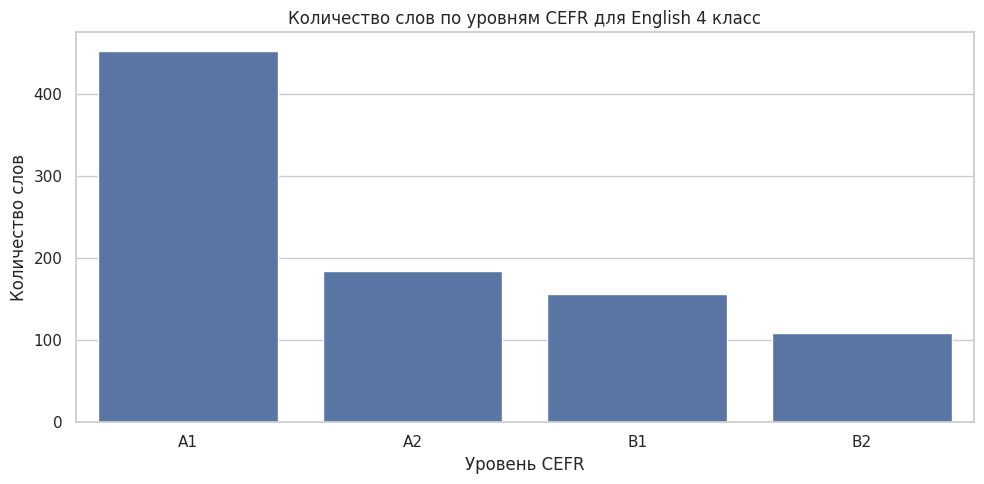

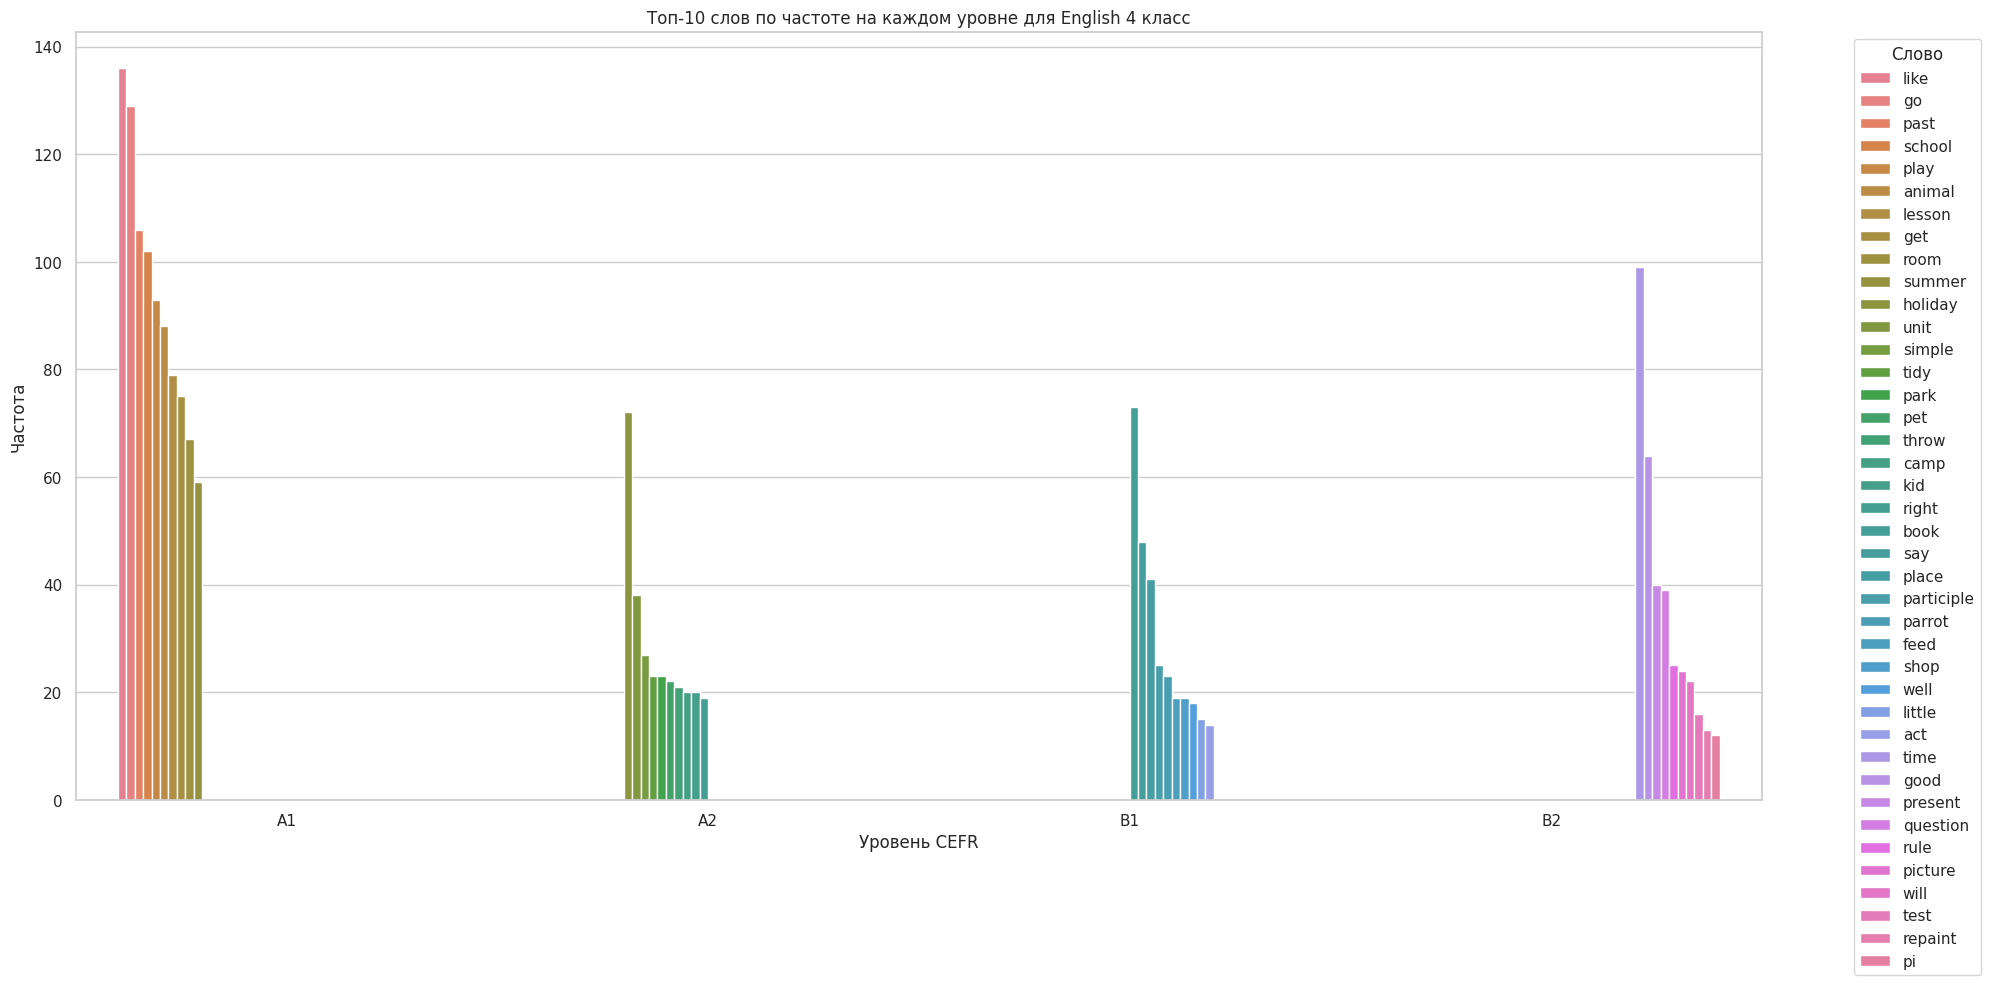

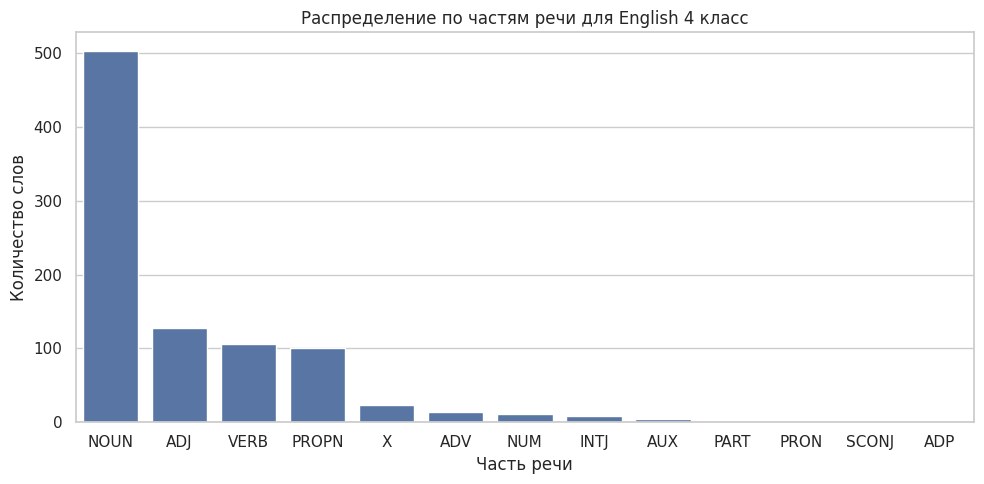

In [ ]:
#визуализация

import matplotlib.pyplot as plt
import seaborn as sns

# Устанавливаем стиль
sns.set(style="whitegrid")

#Гистограмма: количество слов на каждом уровне
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='level', order=sorted(df['level'].unique()))
plt.title('Количество слов по уровням CEFR для English 4 класс')
plt.xlabel('Уровень CEFR')
plt.ylabel('Количество слов')
plt.tight_layout()
plt.savefig('/content/kuzovlev4plot_cefr_levels.png')
plt.show()

#Гистограмма: частота слов топ-10 по каждому уровню
plt.figure(figsize=(20, 10))
sns.barplot(data=top_by_level, x='level', y='frequency', hue='word')
plt.title('Топ-10 слов по частоте на каждом уровне для English 4 класс')
plt.xlabel('Уровень CEFR')
plt.ylabel('Частота')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Слово')
plt.tight_layout()
plt.savefig('/content/kuzovlev4plot_top10_words.png')
plt.show()

#Гистограмма: распределение частей речи
plt.figure(figsize=(10, 5))
sns.barplot(data=pos_counts, x='pos', y='count')
plt.title('Распределение по частям речи для English 4 класс')
plt.xlabel('Часть речи')
plt.ylabel('Количество слов')
plt.tight_layout()
plt.savefig('/content/kuzovlev4plot_pos_distribution.png')
plt.show()


**3. Анализ рецептивной лексики**

Подготовка датасета с лексикой.
1. Извлечь лексику из Word-документа (.docx)
Мы получим два списка:

active_words — из блоков Активная:

passive_words — из блоков Пассивная: (они пойдут в рецептивный словарь)

2. Сохранение в csv. Формат:

| Тип       | Слово    |
| --------- | -------- |
| Пассивная | ant      |
| Пассивная | bed      |
| Активная  | Hello!   |
| Активная  | Goodbye! |

3. Позже используем этот CSV для анализа учебника с лемматизацией через spaCy (только без времён и степеней сравнения!).



In [ ]:
!pip install python-docx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 6.6 MB/s eta 0:00:00


In [ ]:
from docx import Document
import csv
import re

#Путь к файлу Word
DOCX_PATH = "/content/Рецептивная лексика спотлайт.docx"
OUTPUT_CSV = "/content/spotlight_rezeptivnay.csv"

# Функция разбивает строку на отдельные слова (с запятыми и переносами строк)
def extract_words(text):
    text = text.replace('\n', ' ')
    words = re.split(r'[,\s]+', text)
    return [w.strip() for w in words if w.strip()]

# Парсим документ
def parse_docx_vocab(docx_path):
    doc = Document(docx_path)
    current_type = None
    all_entries = []

    for para in doc.paragraphs:
        text = para.text.strip()
        if not text:
            continue
        if text.startswith("Активная"):
            current_type = "Активная"
            continue
        elif text.startswith("Пассивная"):
            current_type = "Пассивная"
            continue
        elif current_type:
            words = extract_words(text)
            for word in words:
                all_entries.append((current_type, word.lower()))

    return all_entries

# Сохраняем в CSV
def save_vocab_to_csv(entries, output_csv):
    with open(output_csv, 'w', newline='', encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerow(['Тип', 'Слово'])
        writer.writerows(entries)

# Запуск
entries = parse_docx_vocab(DOCX_PATH)
save_vocab_to_csv(entries, OUTPUT_CSV)

print(f"Готово! Извлечено {len(entries)} слов.")


Готово! Извлечено 705 слов.


Код для рецептивной вместе:

In [ ]:
from docx import Document
import csv
import re

# Пути к файлам
DOCX_PATH = "/content/Только рецептив (2).docx"
OUTPUT_CSV = "/content/spotlight_rezept_only11.csv"

# Исключённые слова/фразы (в нормализованном виде)
excluded_words = {
    "nanny shine", "lulu", "larry", "chuckles", "yes", "and", "bear", "big", "box", "cake",
    "candles", "chocolate", "colour", "country", "dow", "down", "eyes", "fish", "flowers",
    "garden", "go", "grandma", "grandpa", "hat", "he", "horse", "house", "in", "like",
    "magic", "mouse", "no", "off", "on", "open", "orange", "party", "sing", "small",
    "summer", "sun", "take", "teddy", "the", "to", "toy", "under", "up", "win", "your", "sister"
}

# Нормализация фразы
def normalize_phrase(phrase):
    phrase = phrase.lower().strip()
    phrase = re.sub(r"^(the|a|an)\s+", "", phrase)         # убрать артикли
    phrase = re.sub(r"[.,!?;:…\"'()\[\]]+$", "", phrase)    # убрать пунктуацию в конце
    phrase = re.sub(r"\s+", " ", phrase)                   # нормализовать пробелы
    return phrase

# Извлечение и очистка фраз
def extract_passive_phrases(docx_path):
    doc = Document(docx_path)
    entries = []

    for para in doc.paragraphs:
        text = para.text.strip()
        if not text:
            continue

        # Разделение на фразы по пунктуации или новой строке
        raw_parts = re.split(r'[;,.\n]+', text)

        for part in raw_parts:
            phrase = part.strip()
            # Очистка окончания (точки, запятые и прочее)
            phrase = re.sub(r"[.,!?;:…\"'()\[\]]+$", "", phrase).strip()
            norm = normalize_phrase(phrase)

            # добавляем только если не исключено
            if norm and norm not in excluded_words:
                entries.append(['Пассивная', norm])

    return entries

# Сохранение в CSV
def save_to_csv(entries, path):
    with open(path, 'w', newline='', encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerow(['Тип', 'Нормализованная фраза'])
        writer.writerows(entries)

# Запуск
entries = extract_passive_phrases(DOCX_PATH)
save_to_csv(entries, OUTPUT_CSV)

print(f"Готово! Сохранено {len(entries)} нормализованных фраз. CSV: {OUTPUT_CSV}")


Готово! Сохранено 174 нормализованных фраз. CSV: /content/spotlight_rezept_only11.csv


Этап работы с учебником

Загружаем CSV с активной/пассивной лексикой.

Загружаем учебник .txt, где страницы размечены как === Страница 12 ===.

Лемматизируем текст и слова (с помощью spaCy).

Ищем вхождения каждого слова (с учётом лемм).

Сохраняем результат в новый CSV: с колонками Слово, Тип, Кол-во вхождений, Страницы.

In [ ]:
!pip install -U spacy
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 124.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import re
import spacy
import pandas as pd
from collections import defaultdict

# Загружаем модель spaCy
nlp = spacy.load("en_core_web_sm")

TXT_PATH = "/content/spotlight2.txt"
OUTPUT_PATH = "/content/spotlight_vocab_simple.csv"

# === Словарь ===
WORDS_STR = """

away, bathroom, book, clean, close, clothes, colour, come, cups, day, dear, different, drink, eat, eye, fall, family, favourite, feet, food, forget, fruit, fun, give, good, got, hall, hand, home, kind, know, lights, little, long, look, lots, many, meet, nice, outside, paint, paper, people, place, plate, play, please, put, quick, rain, ready, red, sad, school, see, shop, show, sister, smoke, everyone, something, stay, table, tall, telephone, today, vegetable, wait, wall, want, watch, wear, foot, match, box, time, tooth, tree, house, star, west, card,
around, bowl, clear, crazy, especially, grow, jelly, let’s, lie, lovely, matter, piece, plastic, real, ruler, sail, seat, set, south, stairs, story, surprise, turn, welcome, worry, print, pick, board,
bee, count, cruise, folk, ground, plenty, prayer, shine, spy, touch, typical,
bare, clip, chimney, medal, naughty, roll, string,
shabby,dumpling, gnome, rhyme, pip, yo-yo

"""

# Список слов
vocab_entries = [w.strip() for w in WORDS_STR.replace("\n", " ").split(",") if w.strip()]

def load_textbook(txt_path):
    with open(txt_path, 'r', encoding='utf-8') as f:
        text = f.read()
    # Страницы
    pages = re.split(r'=== Страница (\d+) ===', text)
    return {int(pages[i]): pages[i+1].lower() for i in range(1, len(pages), 2)}

def normalize_keep_punct(phrase):
    """Лемматизация, но без удаления апострофов и дефисов"""
    doc = nlp(phrase.lower())
    # Сохраняем токены, которые хотя бы частично состоят из букв
    return ' '.join(token.lemma_.lower().strip() for token in doc if re.search(r"[a-zA-Z]", token.text))

def lemmatize_keep_punct(text):
    """Лемматизируем весь текст, сохраняя слова с дефисами/апострофами"""
    doc = nlp(text)
    return ' '.join(token.lemma_.lower().strip() for token in doc if re.search(r"[a-zA-Z]", token.text))

def count_word_occurrences(words, pages):
    lemmatized_pages = {p: lemmatize_keep_punct(t) for p, t in pages.items()}
    counts = defaultdict(int)
    for word in words:
        norm_word = normalize_keep_punct(word)
        total_count = 0
        for text in lemmatized_pages.values():
            # Ищем по лемме и по исходной форме
            total_count += len(re.findall(r'\b' + re.escape(norm_word) + r'\b', text))
            total_count += len(re.findall(r'\b' + re.escape(word.lower()) + r'\b', text))
        if total_count > 0:
            counts[word] += total_count
    return counts

def group_by_frequency(counts):
    freq_map = defaultdict(list)
    for word, count in counts.items():
        freq_map[count].append(word)
    grouped = []
    for count, words in sorted(freq_map.items(), key=lambda x: -x[0]):
        words_sorted = sorted(words)
        grouped.append({
            "Слова": ", ".join(words_sorted),
            "Количество употреблений": count,
            "Количество слов в группе": len(words_sorted)
        })
    return grouped

# Запуск
pages = load_textbook(TXT_PATH)
counts = count_word_occurrences(vocab_entries, pages)
grouped_data = group_by_frequency(counts)

# Сохраняем
df = pd.DataFrame(grouped_data)
df.to_csv(OUTPUT_PATH, index=False, encoding='utf-8-sig')

# Показываем пропавшие слова
missing_words = [w for w in vocab_entries if w not in counts]
print("Слова без вхождений:", missing_words)
print("Количество пропавших:", len(missing_words))

print("Готово! Файл сохранён:", OUTPUT_PATH)


Слова без вхождений: ['many', 'telephone', 'match', 'west', 'card', 'bowl', 'let’s', 'print', 'dumpling', 'yo-yo']
Количество пропавших: 10
Готово! Файл сохранён: /content/spotlight_vocab_simple.csv


In [ ]:
# ... (предыдущий код без изменений)

# Запуск
print(f"Всего слов для поиска: {len(vocab_entries)}")

pages = load_textbook(TXT_PATH)
counts = count_word_occurrences(vocab_entries, pages)

print(f"Слов, найденных в тексте: {len(counts)}")

grouped_data = group_by_frequency(counts)

# Сохраняем
df = pd.DataFrame(grouped_data)
df.to_csv(OUTPUT_PATH, index=False, encoding='utf-8-sig')

# Показываем пропавшие слова
missing_words = [w for w in vocab_entries if w not in counts]
print("Слова без вхождений:", missing_words)
print("Количество пропавших:", len(missing_words))

print("Готово! Файл сохранён:", OUTPUT_PATH)


Всего слов для поиска: 134
Слов, найденных в тексте: 124
Слова без вхождений: ['many', 'telephone', 'match', 'west', 'card', 'bowl', 'let’s', 'print', 'dumpling', 'yo-yo']
Количество пропавших: 10
Готово! Файл сохранён: /content/spotlight_vocab_simple.csv


In [ ]:
import re

def parse_word_list(text):
    # Заменяем переводы строк и точки с запятой на запятую, потом разбиваем
    clean_text = re.sub(r'[\n;]+', ',', text)
    words = [w.strip().lower() for w in clean_text.split(',') if w.strip()]
    return set(words)

# Вставь сюда свои списки:
list1 = """
cat, cheese, dog, egg, glass, rabbit, sheep, snake, umbrella, window

"""

list2 = """
away, bathroom, book, clean, close, clothes, colour, come, cups, day, dear, different, drink, eat, eye, fall, family, favourite, feet, food, forget, fruit, fun, give, good, got, hall, hand, home, kind, know, lights, little, long, look, lots, many, meet, nice, outside, paint, paper, people, place, plate, play, please, put, quick, rain, ready, red, sad, school, see, shop, show, sister, smoke, everyone, something, stay, table, tall, telephone, today, vegetable, wait, wall, want, watch, wear, foot, match, box, time, tooth, tree, house, star, west, card
"""

set1 = parse_word_list(list1)
set2 = parse_word_list(list2)

print(f"Количество слов в первом списке: {len(set1)}")
print(f"Количество слов во втором списке: {len(set2)}")

common = set1 & set2
print(f"Общие слова (пересечение): {len(common)}")

unique_to_list1 = set1 - set2
print(f"Слова, уникальные для первого списка ({len(unique_to_list1)}):")
print(sorted(unique_to_list1))

unique_to_list2 = set2 - set1
print(f"Слова, уникальные для второго списка ({len(unique_to_list2)}):")
print(sorted(unique_to_list2))

print(f"Общие слова ({len(common)}):")
print(sorted(common))



Количество слов в первом списке: 21
Количество слов во втором списке: 82
Общие слова (пересечение): 17
Слова, уникальные для первого списка (4):
['let’s', 'lot’s', 'print', 'sail']
Слова, уникальные для второго списка (65):
['away', 'bathroom', 'book', 'card', 'clean', 'close', 'clothes', 'colour', 'cups', 'day', 'dear', 'different', 'drink', 'eat', 'everyone', 'fall', 'family', 'feet', 'forget', 'fruit', 'fun', 'give', 'good', 'hall', 'hand', 'home', 'kind', 'know', 'lights', 'long', 'lots', 'many', 'match', 'meet', 'nice', 'outside', 'paint', 'paper', 'people', 'place', 'plate', 'play', 'please', 'put', 'quick', 'rain', 'ready', 'sad', 'school', 'shop', 'show', 'sister', 'smoke', 'something', 'star', 'stay', 'tall', 'telephone', 'time', 'tooth', 'vegetable', 'wait', 'want', 'watch', 'west']
Общие слова (17):
['box', 'come', 'eye', 'favourite', 'food', 'foot', 'got', 'house', 'little', 'look', 'red', 'see', 'table', 'today', 'tree', 'wall', 'wear']


ось X — номера страниц

ось Y — слова

точки — где слово встречается на конкретной странице

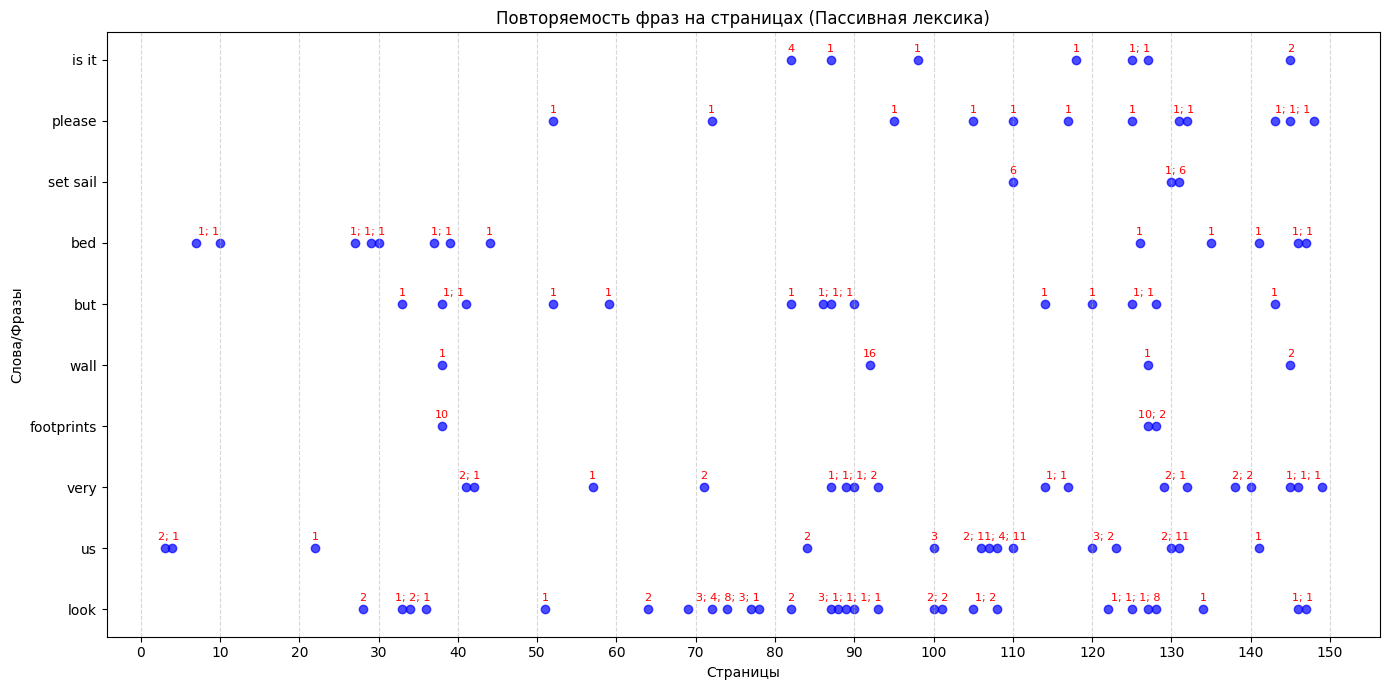

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

csv_path = "spotlight_vocab_resultt.csv"
df = pd.read_csv(csv_path)
df = df.head(10)

phrases = df['Фраза'].tolist()
phrase_to_index = {phrase: i for i, phrase in enumerate(phrases)}

# Словарь для хранения по фразам: y -> список (x, count)
points_per_phrase = defaultdict(list)

for _, row in df.iterrows():
    phrase = row['Фраза']
    y = phrase_to_index[phrase]
    page_count_str = str(row['Страницы с частотой'])
    parts = [p.strip() for p in page_count_str.split(',')]
    for part in parts:
        if '(' in part and ')' in part:
            page_str, count_str = part.split('(')
            page = int(page_str.strip())
            count = int(count_str.strip(') '))
            points_per_phrase[y].append((page, count))

plt.figure(figsize=(14, len(phrases)*0.5 + 2))

# Рисуем точки и подписи с группировкой
delta_x = 3  # максимальное расстояние по X, чтобы считать близко

for y, points in points_per_phrase.items():
    # Сортируем по X (странице)
    points.sort(key=lambda x: x[0])
    xs = [p[0] for p in points]
    counts = [p[1] for p in points]

    # Рисуем точки
    plt.scatter(xs, [y]*len(xs), color='blue', alpha=0.7)

    # Группируем подписи по близости
    group = []
    group_xs = []
    for i, (x, c) in enumerate(points):
        if not group:
            group.append(str(c))
            group_xs.append(x)
        else:
            # если расстояние между текущей и предыдущей точкой меньше delta_x — добавляем в группу
            if x - group_xs[-1] <= delta_x:
                group.append(str(c))
                group_xs.append(x)
            else:
                # вывести подпись для предыдущей группы — в центре группы
                center_x = sum(group_xs) / len(group_xs)
                plt.text(center_x, y + 0.1, '; '.join(group), fontsize=8, ha='center', va='bottom', color='red')
                # начать новую группу
                group = [str(c)]
                group_xs = [x]
    # Вывести подпись для последней группы
    if group:
        center_x = sum(group_xs) / len(group_xs)
        plt.text(center_x, y + 0.1, '; '.join(group), fontsize=8, ha='center', va='bottom', color='red')

plt.yticks(range(len(phrases)), phrases)
plt.xticks(range(0, 151, 10))
plt.xlabel("Страницы")
plt.ylabel("Слова/Фразы")
plt.title("Повторяемость фраз на страницах (Пассивная лексика)")
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Для одного слова с чтением txt

   Фраза  Кол-во повторений                                Страницы с частотой
0   look                 55  28 (2), 33 (1), 36 (1), 51 (1), 64 (2), 69 (3)...
1    got                 43  18 (1), 85 (3), 86 (3), 87 (5), 88 (3), 90 (6)...
2  house                 32  3 (1), 27 (1), 28 (1), 30 (2), 31 (1), 32 (1),...


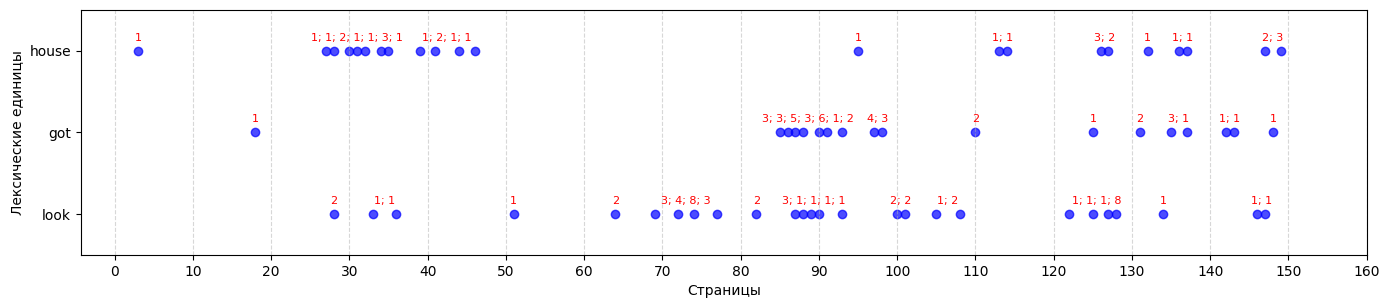

In [ ]:
import re
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt

# --- входной TXT ---
txt_path = "spotlight2.txt"

# --- список целевых слов ---
target_words = [
    "look", "got", "house"
]

# --- регулярка для страницы ---
page_pattern = re.compile(r"===\s*Страница\s+(\d+)\s*===")

# читаем файл
with open(txt_path, encoding="utf-8") as f:
    lines = [line.strip() for line in f]

# --- анализ ---
results = []
for word in target_words:
    word_pattern = re.compile(rf"\b{re.escape(word.lower())}\b")
    current_page = None
    page_hits = defaultdict(int)

    for line in lines:
        # ищем заголовок страницы
        m = page_pattern.match(line)
        if m:
            current_page = int(m.group(1))
            continue

        # считаем вхождения слова
        if current_page is not None:
            count = len(word_pattern.findall(line.lower()))
            if count > 0:
                page_hits[current_page] += count

    if page_hits:
        page_freq_list = [f"{p} ({page_hits[p]})" for p in sorted(page_hits)]
        total_count = sum(page_hits.values())
        results.append({
            "Фраза": word,
            "Кол-во повторений": total_count,
            "Страницы с частотой": ", ".join(page_freq_list)
        })

# --- DataFrame ---
df_exact = pd.DataFrame(results)

if df_exact.empty:
    print("Ни одно слово не найдено.")
else:
    print(df_exact)

    # --- строим график ---
    phrases = df_exact['Фраза'].tolist()
    phrase_to_index = {phrase: i for i, phrase in enumerate(phrases)}
    points_per_phrase = defaultdict(list)

    for _, row in df_exact.iterrows():
        phrase = row['Фраза']
        y = phrase_to_index[phrase]
        parts = [p.strip() for p in row['Страницы с частотой'].split(',')]
        for part in parts:
            if '(' in part and ')' in part:
                page_str, count_str = part.split('(')
                page = int(page_str.strip())
                count = int(count_str.strip(') '))
                points_per_phrase[y].append((page, count))

    plt.figure(figsize=(14, len(phrases) * 0.5 + 2))
    delta_x = 3
    label_offset = 0.1  # увеличено вертикальное смещение для подписей

    for y, points in points_per_phrase.items():
        points.sort(key=lambda x: x[0])
        xs = [p[0] for p in points]
        plt.scatter(xs, [y] * len(xs), color='blue', alpha=0.7)

        group = []
        group_xs = []
        for x, c in points:
            if not group:
                group.append(str(c))
                group_xs.append(x)
            else:
                if x - group_xs[-1] <= delta_x:
                    group.append(str(c))
                    group_xs.append(x)
                else:
                    center_x = sum(group_xs) / len(group_xs)
                    plt.text(center_x, y + label_offset, '; '.join(group),
                             fontsize=8, ha='center', va='bottom', color='red')
                    group = [str(c)]
                    group_xs = [x]

        if group:
            center_x = sum(group_xs) / len(group_xs)
            plt.text(center_x, y + label_offset, '; '.join(group),
                     fontsize=8, ha='center', va='bottom', color='red')

    plt.yticks(range(len(phrases)), phrases)

    max_page = max(max(p[0] for p in pts) for pts in points_per_phrase.values())
    plt.xticks(range(0, max_page + 15, 10))

    plt.xlabel("Страницы")
    plt.ylabel("Лексические единицы")

    plt.grid(True, axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()

    # Увеличиваем отступы сверху и снизу, чтобы текст не заезжал за края
    plt.subplots_adjust(bottom=0.15, top=0.85)

    # Смещаем границы по Y, чтобы метки не касались верхней и нижней граней
    plt.ylim(-0.5, len(phrases) - 0.5)

    plt.show()


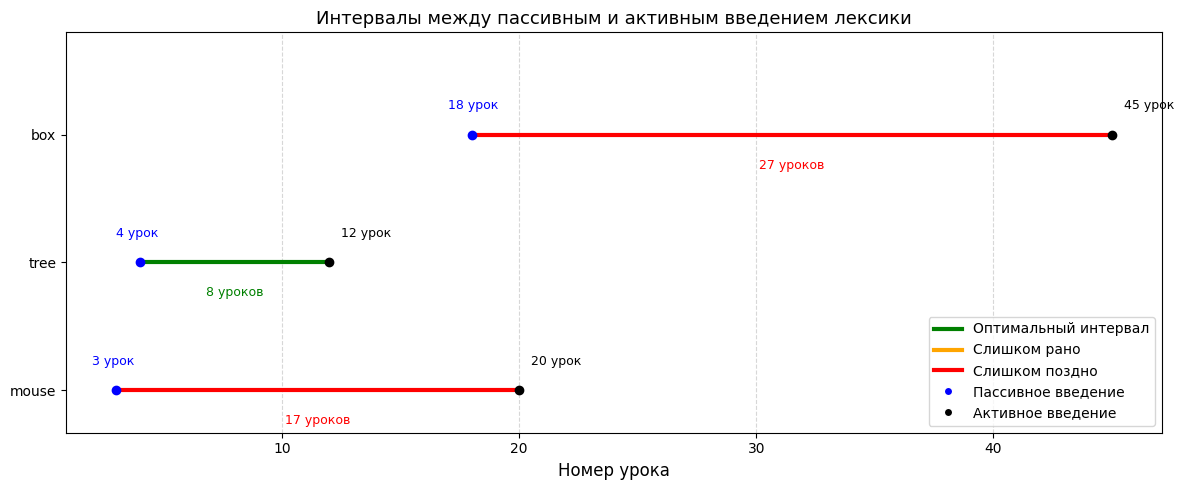

In [ ]:
import matplotlib.pyplot as plt

# Данные
words = ['mouse', 'tree', 'box']
passive_lessons = [3, 4, 18]
active_lessons = [20, 12, 45]

# Цвета по интервалу
colors = []
for p, a in zip(passive_lessons, active_lessons):
    interval = a - p
    if interval < 5:
        colors.append('orange')  # слишком рано
    elif interval > 15:
        colors.append('red')     # слишком поздно
    else:
        colors.append('green')  # оптимально

# Настройка графика
fig, ax = plt.subplots(figsize=(12, 5))  # увеличим ширину

y_positions = [i * 1.5 for i in range(len(words))]  # увеличим расстояние между строками

for i, word in enumerate(words):
    y = y_positions[i]

    # линия интервала
    ax.hlines(y=y, xmin=passive_lessons[i], xmax=active_lessons[i],
              color=colors[i], linewidth=3)

    # точки начала и конца
    ax.plot(passive_lessons[i], y, 'o', color='blue', label='Пассивное' if i == 0 else "")
    ax.plot(active_lessons[i], y, 'o', color='black', label='Активное' if i == 0 else "")

    # текстовые подписи (немного смещаем вверх)
    ax.text(passive_lessons[i]-1, y+0.3, f"{passive_lessons[i]} урок", fontsize=9, color='blue')
    ax.text(active_lessons[i]+0.5, y+0.3, f"{active_lessons[i]} урок", fontsize=9, color='black')

    # подпись интервала
    interval = active_lessons[i] - passive_lessons[i]
    ax.text((passive_lessons[i] + active_lessons[i]) / 2, y - 0.4,
            f"{interval} уроков", fontsize=9, ha='center', color=colors[i])

# Оформление
ax.set_yticks(y_positions)
ax.set_yticklabels(words)
ax.set_xlabel("Номер урока", fontsize=12)
ax.set_title("Интервалы между пассивным и активным введением лексики", fontsize=13)

# Легенда
legend_elements = [
    plt.Line2D([0], [0], color='green', lw=3, label='Оптимальный интервал'),
    plt.Line2D([0], [0], color='orange', lw=3, label='Слишком рано'),
    plt.Line2D([0], [0], color='red', lw=3, label='Слишком поздно'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', label='Пассивное введение'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='black', label='Активное введение')
]
ax.legend(handles=legend_elements, loc='lower right')
ax.grid(axis='x', linestyle='--', alpha=0.5)
ax.set_ylim(-0.5, max(y_positions)+1.2)  # отступы сверху и снизу

plt.tight_layout()
plt.show()


Введите слово для анализа: mouse
Введите общее количество страниц в учебнике: 144
Найдены вхождения слова 'mouse' на страницах:
  Страница 9: 1 раз(а)
  Страница 10: 1 раз(а)
  Страница 12: 1 раз(а)
  Страница 41: 2 раз(а)
  Страница 42: 1 раз(а)
  Страница 59: 6 раз(а)
  Страница 60: 1 раз(а)
  Страница 77: 1 раз(а)
  Страница 78: 3 раз(а)
  Страница 95: 2 раз(а)
  Страница 96: 1 раз(а)
  Страница 113: 2 раз(а)
  Страница 114: 1 раз(а)
  Страница 132: 3 раз(а)
  Страница 133: 2 раз(а)
  Страница 134: 3 раз(а)
  Страница 135: 3 раз(а)
  Страница 136: 2 раз(а)
  Страница 146: 1 раз(а)
  Страница 149: 2 раз(а)
Страница введения слова (минимальная страница с вхождением): 9

Расписание повторений слова по страницам:
9, 10, 12, 15, 20, 28, 37, 47, 58, 70, 83, 97, 112, 127, 144


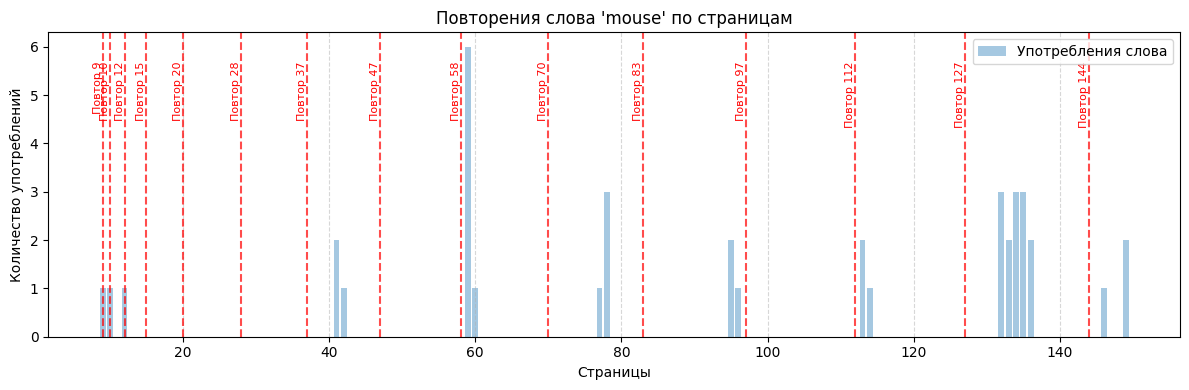

In [ ]:
import re
from collections import defaultdict
import matplotlib.pyplot as plt

def parse_word_pages(txt_path: str, target_word: str) -> dict[int, int]:
    """
    Парсит txt и возвращает словарь {страница: кол-во вхождений слова}
    """
    page_pattern = re.compile(r"===\s*Страница\s+(\d+)\s*===")
    word_pattern = re.compile(rf"\b{re.escape(target_word.lower())}\b")

    current_page = None
    page_hits = defaultdict(int)

    with open(txt_path, encoding="utf-8") as f:
        for line in f:
            line = line.strip()
            m = page_pattern.match(line)
            if m:
                current_page = int(m.group(1))
                continue
            if current_page is not None:
                count = len(word_pattern.findall(line.lower()))
                if count > 0:
                    page_hits[current_page] += count
    return dict(page_hits)

def calculate_repetitions_15_adapted(intro_page: int, total_pages: int) -> list[int]:
    """
    Расписание из 15 повторений:
    - первые три повторения: intro_page, intro_page+1, intro_page+3
    - далее 12 повторений с экспоненциально растущими интервалами до total_pages
    """
    repetitions = [intro_page]

    first_rep = intro_page + 1
    if first_rep <= total_pages:
        repetitions.append(first_rep)

    second_rep = first_rep + 2  # = intro_page + 3
    if second_rep <= total_pages:
        repetitions.append(second_rep)

    remaining_reps = 12
    start_long = repetitions[-1]
    remaining_length = total_pages - start_long
    if remaining_length <= 0:
        return sorted(set(repetitions))

    for i in range(1, remaining_reps + 1):
        fraction = (i / remaining_reps) ** 1.5  # экспоненциальный рост интервалов
        page = start_long + int(fraction * remaining_length)
        if page <= total_pages:
            repetitions.append(page)
        else:
            break

    return sorted(set(repetitions))

def visualize_repetitions(page_hits: dict[int, int], repetitions: list[int], target_word: str):
    pages = sorted(page_hits.keys())
    counts = [page_hits[p] for p in pages]

    plt.figure(figsize=(12, 4))

    plt.bar(pages, counts, alpha=0.4, label='Употребления слова')

    y_max = max(counts) if counts else 1
    for rep in repetitions:
        plt.axvline(x=rep, color='red', linestyle='--', alpha=0.7)
        plt.text(rep, y_max * 0.95, f'Повтор {rep}', rotation=90, color='red', fontsize=8, ha='right', va='top')

    plt.title(f"Повторения слова '{target_word}' по страницам")
    plt.xlabel("Страницы")
    plt.ylabel("Количество употреблений")
    plt.legend()
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

def main():
    txt_path = "spotlight2.txt"
    target_word = input("Введите слово для анализа: ").strip().lower()
    total_pages = int(input("Введите общее количество страниц в учебнике: ").strip())

    page_hits = parse_word_pages(txt_path, target_word)
    if not page_hits:
        print(f"Слово '{target_word}' нигде не встречается в тексте.")
        return

    print(f"Найдены вхождения слова '{target_word}' на страницах:")
    for p, c in sorted(page_hits.items()):
        print(f"  Страница {p}: {c} раз(а)")

    intro_page = min(page_hits.keys())
    print(f"Страница введения слова (минимальная страница с вхождением): {intro_page}")

    repetitions = calculate_repetitions_15_adapted(intro_page, total_pages)

    print("\nРасписание повторений слова по страницам:")
    print(", ".join(map(str, repetitions)))

    visualize_repetitions(page_hits, repetitions, target_word)

if __name__ == "__main__":
    main()


Only for one word/phrase

In [ ]:
import pandas as pd
import re
from collections import defaultdict
import matplotlib.pyplot as plt

csv_path = "spotlight_vocab_resultt.csv"
df = pd.read_csv(csv_path)

# === выбираем целевое слово ===
target_word = "cat"  # <-- можно менять

# --- Шаг 1. Покажем все строки, где встречается подстрока 'colour' ---
df_found_any = df[df['Фраза'].str.lower().str.contains(target_word.lower(), na=False)]

if df_found_any.empty:
    print(f"Слово '{target_word}' нигде не встречается даже как часть других слов/фраз")
else:
    print(f"Найдены следующие вхождения '{target_word}' (любая форма):")
    print(df_found_any[['Фраза', 'Кол-во повторений', 'Страницы с частотой']])

# --- Шаг 2. Фильтруем ТОЛЬКО точное вхождение (как отдельное слово) ---
mask_exact = df['Фраза'].str.lower().str.contains(rf"\b{re.escape(target_word.lower())}\b", na=False)
df_exact = df[mask_exact]

if df_exact.empty:
    print(f"\nСлово '{target_word}' не найдено как отдельное слово/фраза")
else:
    print(f"\nСлово '{target_word}' найдено как отдельная фраза")
    print(df_exact[['Фраза', 'Кол-во повторений', 'Страницы с частотой']])

    # Если есть точное вхождение, строим график
    phrases = df_exact['Фраза'].tolist()
    phrase_to_index = {phrase: i for i, phrase in enumerate(phrases)}

    points_per_phrase = defaultdict(list)

    for _, row in df_exact.iterrows():
        phrase = row['Фраза']
        y = phrase_to_index[phrase]
        page_count_str = str(row['Страницы с частотой'])
        parts = [p.strip() for p in page_count_str.split(',')]
        for part in parts:
            if '(' in part and ')' in part:
                page_str, count_str = part.split('(')
                page = int(page_str.strip())
                count = int(count_str.strip(') '))
                points_per_phrase[y].append((page, count))

    plt.figure(figsize=(14, 2.5))
    delta_x = 3
    label_offset = 0.02

    for y, points in points_per_phrase.items():
        points.sort(key=lambda x: x[0])
        xs = [p[0] for p in points]

        plt.scatter(xs, [y]*len(xs), color='blue', alpha=0.7)

        group = []
        group_xs = []
        for x, c in points:
            if not group:
                group.append(str(c))
                group_xs.append(x)
            else:
                if x - group_xs[-1] <= delta_x:
                    group.append(str(c))
                    group_xs.append(x)
                else:
                    center_x = sum(group_xs) / len(group_xs)
                    plt.text(center_x, y + label_offset, '; '.join(group),
                             fontsize=8, ha='center', va='bottom', color='red')
                    group = [str(c)]
                    group_xs = [x]

        if group:
            center_x = sum(group_xs) / len(group_xs)
            plt.text(center_x, y + label_offset, '; '.join(group),
                     fontsize=8, ha='center', va='bottom', color='red')

    plt.yticks(range(len(phrases)), phrases)
    plt.xticks(range(0, 151, 10))
    plt.xlabel("Страницы")
    plt.ylabel("Фраза")
    plt.title(f"Повторяемость '{target_word}' на страницах")
    plt.grid(True, axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


Найдены следующие вхождения 'cat' (любая форма):
                         Фраза  Кол-во повторений Страницы с частотой
97  it's raining cats and dogs                  1             102 (1)

Слово 'cat' не найдено как отдельное слово/фраза


Формирование таблицы с общим распределением слов и количеством употреблений в учебнике

In [ ]:
import pandas as pd
import spacy
from collections import defaultdict

# Пути к файлам
PHRASES_CSV = "/content/spotlight_vocab_resultt.csv"   # результат первой ячейки
WORDS_GROUPED_CSV = "/content/spotlight_words_grouped_by_freq.csv"  # только группировка

# Загружаем spaCy
nlp = spacy.load("en_core_web_sm")

# Лемматизация фразы → список слов
def normalize_phrase_to_words(phrase):
    doc = nlp(phrase.lower())
    return [token.lemma_.lower().strip() for token in doc if token.is_alpha]

# Подсчёт слов из таблицы фраз
def count_words_from_phrases(csv_path):
    df = pd.read_csv(csv_path)
    word_counts = defaultdict(int)

    for _, row in df.iterrows():
        phrase = str(row['Фраза'])
        repeats = int(row['Кол-во повторений'])
        words = normalize_phrase_to_words(phrase)

        for w in words:
            # если фраза встречалась N раз → каждое слово +N
            word_counts[w] += repeats

    return word_counts

# Группировка слов по количеству употреблений
def group_words_by_frequency(word_counts):
    freq_groups = defaultdict(list)

    for word, count in word_counts.items():
        freq_groups[count].append(word)

    grouped_rows = []
    # сортируем по убыванию количества
    for freq in sorted(freq_groups.keys(), reverse=True):
        words_sorted = sorted(freq_groups[freq])
        grouped_rows.append({
            "Количество употреблений": freq,
            "Слова": ", ".join(words_sorted)
        })

    return grouped_rows

# === Основной код ===
word_counts = count_words_from_phrases(PHRASES_CSV)

# Только группировка (без отдельной таблицы всех слов)
grouped_rows = group_words_by_frequency(word_counts)
df_grouped = pd.DataFrame(grouped_rows)
df_grouped.to_csv(WORDS_GROUPED_CSV, index=False, encoding="utf-8-sig")

print(f"Готово! Уникальных слов: {len(word_counts)}")
print(f"Сохранено: {WORDS_GROUPED_CSV}")
print(df_grouped.head(10))


Готово! Уникальных слов из списка: 33
Сохранено: /content/spotlight_words_grouped_by_freq_direct.csv
   Количество употреблений        Слова
0                       41        mouse
1                       24         tree
2                       20          box
3                       19          cat
4                       17  fish, horse
5                       14          dog
6                       13          bed
7                       10          egg
8                        9       cheese
9                        7  ant, window


Напрямую из учебника без учета слов, которые перешли в активную.

In [ ]:
import pandas as pd
import spacy
from collections import defaultdict
import re

# Пути к файлам
TEXTBOOK_PATH = "/content/spotlight2.txt"
WORDS_GROUPED_CSV = "/content/spotlight_words_grouped_by_freq_direct.csv"

# Целевой список слов для подсчёта (лемматизированный список)
target_words = [
    "bed", "egg", "cheese", "ant", "window", "jug", "kangaroo", "lamp", "queen",
    "snake", "glass", "nest", "pin", "vest", "chick", "flag", "ink", "sheep",
    "box", "cat", "dog", "horse", "mouse", "orange", "rabbit", "tree", "umbrella",
    "fish", "ship", "thumb", "yacht", "zip", "thimble"
]

# Загружаем spaCy модель
nlp = spacy.load("en_core_web_sm")

# Лемматизация списка слов для точного сопоставления
target_words_lemmas = set()
for w in target_words:
    doc = nlp(w)
    lemmas = [token.lemma_.lower() for token in doc if token.is_alpha]
    target_words_lemmas.update(lemmas)

# Загрузка и лемматизация полного текста учебника
with open(TEXTBOOK_PATH, "r", encoding="utf-8") as f:
    text = f.read().lower()

doc = nlp(text)
lemmas_in_text = [token.lemma_ for token in doc if token.is_alpha]

# Подсчет количества употреблений целевых слов
word_counts = defaultdict(int)
for lemma in lemmas_in_text:
    if lemma in target_words_lemmas:
        word_counts[lemma] += 1

# Группировка слов по количеству употреблений
freq_groups = defaultdict(list)
for word in target_words:
    # Лемматизируем слово для поиска
    doc = nlp(word)
    lemma = " ".join([token.lemma_ for token in doc if token.is_alpha])
    count = word_counts.get(lemma, 0)
    freq_groups[count].append(word)

# Формируем итоговую таблицу
grouped_rows = []
for freq in sorted(freq_groups.keys(), reverse=True):
    words_sorted = sorted(freq_groups[freq])
    grouped_rows.append({
        "Количество употреблений": freq,
        "Слова": ", ".join(words_sorted)
    })

df_grouped = pd.DataFrame(grouped_rows)
df_grouped.to_csv(WORDS_GROUPED_CSV, index=False, encoding="utf-8-sig")

print(f"Готово! Уникальных слов из списка: {len(target_words)}")
print(f"Сохранено: {WORDS_GROUPED_CSV}")
print(df_grouped.head(10))


Количсетво употреблений в учебнике только для вспомогательного модуля My Letters

In [ ]:
import pandas as pd
import spacy
from collections import defaultdict

# Пути к файлам
PHRASES_CSV = "/content/spotlight_vocab_resultt.csv"   # результат первой ячейки
WORDS_GROUPED_CSV = "/content/spotlight_words_grouped_2selected.csv"  # только отобранные слова, сгруппированные

# Загружаем spaCy
nlp = spacy.load("en_core_web_sm")

# Список слов, которые хотим проверить
target_words = [
    "bed", "egg", "cheese", "ant", "window", "jug", "kangaroo", "lamp", "queen",
    "snake", "glass", "nest", "pin", "vest", "chick", "flag", "ink", "sheep",
    "box", "cat", "dog", "horse", "mouse", "orange", "rabbit", "tree", "umbrella",
    "fish", "ship", "thumb", "yacht", "zip", "thimble"
]


# Лемматизация фразы → список слов
def normalize_phrase_to_words(phrase):
    doc = nlp(phrase.lower())
    return [token.lemma_.lower().strip() for token in doc if token.is_alpha]

# Подсчёт слов из таблицы фраз
def count_words_from_phrases(csv_path):
    df = pd.read_csv(csv_path)
    word_counts = defaultdict(int)

    for _, row in df.iterrows():
        phrase = str(row['Фраза'])
        repeats = int(row['Кол-во повторений'])
        words = normalize_phrase_to_words(phrase)

        for w in words:
            word_counts[w] += repeats

    return word_counts

# === Основной код ===
word_counts = count_words_from_phrases(PHRASES_CSV)

# Фильтруем только нужные слова
selected_counts = {w: word_counts.get(w, 0) for w in target_words}

# Группируем слова по количеству употреблений
freq_groups = defaultdict(list)
for word, count in selected_counts.items():
    freq_groups[count].append(word)

# Формируем строки с объединёнными словами по частоте
grouped_rows = []
for freq in sorted(freq_groups.keys(), reverse=True):
    words_sorted = sorted(freq_groups[freq])
    grouped_rows.append({
        "Количество употреблений": freq,
        "Слова": ", ".join(words_sorted)
    })

# Создаём итоговый DataFrame
df_grouped = pd.DataFrame(grouped_rows)

# Сохраняем в CSV
df_grouped.to_csv(WORDS_GROUPED_CSV, index=False, encoding="utf-8-sig")

print(f"Готово! Проверено {len(target_words)} слов.")
print(df_grouped)


Готово! Проверено 33 слов.
   Количество употреблений                                              Слова
0                       13                                                bed
1                       10                                                egg
2                        9                                             cheese
3                        7                                        ant, window
4                        5                                jug, kangaroo, lamp
5                        4                                       queen, snake
6                        3                             glass, nest, pin, vest
7                        2                            chick, flag, ink, sheep
8                        1     box, cat, dog, mouse, thimble, thumb, umbrella
9                        0  fish, horse, orange, rabbit, ship, tree, yacht...


Для основных модулей без лемматизации

In [ ]:
import pandas as pd
import re
from collections import defaultdict

# Пути к файлам — подставь свои
PHRASES_CSV = "/content/spotlight_vocab_resultt.csv"
WORDS_GROUPED_CSV = "/content/spotlight_words_grouped_selected.csv"

# Список слов для поиска
target_words = [
    "away", "bathroom", "book", "clean", "close", "clothes", "colour", "come", "cups", "day",
    "dear", "different", "drink", "eat", "eye", "fall", "family", "favourite", "feet", "food",
    "forget", "fruit", "fun", "give", "good", "got", "hall", "hand", "home", "kind", "know",
    "lights", "little", "long", "look", "lots", "many", "meet", "nice", "outside", "paint",
    "paper", "people", "place", "plate", "play", "please", "put", "quick", "rain", "ready",
    "red", "sad", "school", "see", "shop", "show", "sister", "smoke", "everyone", "something",
    "stay", "table", "tall", "telephone", "today", "vegetable", "wait", "wall", "want", "watch",
    "wear", "foot", "match", "box", "show", "time", "tooth", "tree", "house", "star", "around",
    "bowl", "clear", "crazy", "especially", "everyone", "grow", "jelly", "let’s", "lie", "lovely",
    "matter", "piece", "plastic", "real", "ruler", "sail", "seat", "set", "south", "stairs",
    "story", "surprise", "turn", "welcome", "worry", "print", "pick", "bee", "count", "cruise",
    "folk", "ground", "pick", "plenty", "prayer", "sail", "shine", "southwest", "spy", "touch",
    "typical", "bare", "cardboard", "clip", "chimney", "medal", "naughty", "roll", "string",
    "shabby", "dumpling", "gnome", "rhyme", "pip", "yo-yo"
]

def plural_pattern(word: str) -> str:
    word = word.lower()
    if re.search(r'[^aeiou]y$', word):
        base = word[:-1]
        pattern = rf"{re.escape(base)}(y|ies)"
    elif re.search(r'(s|x|z|ch|sh)$', word):
        pattern = rf"{re.escape(word)}(es)?"
    else:
        pattern = rf"{re.escape(word)}(s)?"
    return rf"\b{pattern}\b"

def count_words_exact(csv_path, target_words):
    df = pd.read_csv(csv_path)
    word_counts = defaultdict(int)

    for _, row in df.iterrows():
        phrase = str(row['Фраза']).lower()
        repeats = int(row['Кол-во повторений'])

        for w in target_words:
            pattern = plural_pattern(w)
            if re.search(pattern, phrase):
                word_counts[w] += repeats

    return word_counts

# --- Основной блок ---

word_counts = count_words_exact(PHRASES_CSV, target_words)

# Группируем слова по частотам
freq_groups = defaultdict(list)
for word, count in word_counts.items():
    freq_groups[count].append(word)

grouped_rows = []
for freq in sorted(freq_groups.keys(), reverse=True):
    words_sorted = sorted(freq_groups[freq])
    grouped_rows.append({
        "Количество употреблений": freq,
        "Слова": ", ".join(words_sorted)
    })

df_grouped = pd.DataFrame(grouped_rows)
df_grouped.to_csv(WORDS_GROUPED_CSV, index=False, encoding="utf-8-sig")

print(f"Готово! Проверено {len(target_words)} слов.")
print(df_grouped)


Готово! Проверено 137 слов.
    Количество употреблений                                              Слова
0                        59                                               look
1                        26                                               sail
2                        20                                               wall
3                        14                                           everyone
4                        13                                                set
5                        12                                             please
6                        11                                               want
7                        10                                             family
8                         8                                           bathroom
9                         7                                        people, put
10                        6                                                eye
11                      

In [ ]:
import pandas as pd

df = pd.read_csv(PHRASES_CSV)
mask = df['Фраза'].str.contains("footprint", case=False, na=False)
print(df[mask][['Фраза', 'Кол-во повторений']])


        Фраза  Кол-во повторений
3  footprints                 22


In [ ]:
import pandas as pd
import spacy
from collections import defaultdict

# Пути к файлам
PHRASES_CSV = "/content/spotlight_vocab_resultt.csv"
WORDS_GROUPED_CSV = "/content/spotlight_words_grouped_2selected.csv"

# Загружаем spaCy для лемматизации
nlp = spacy.load("en_core_web_sm")

# Список слов, которые хотим проверить
target_words = [
    'bare', 'bathroom', 'bee', 'big', 'book', 'box', 'cake', 'candle', 'cardboard', 'chimney',
    'chocolate', 'clean', 'clear', 'clip', 'clothes', 'colour', 'come', 'count', 'country',
    'crazy', 'cruise', 'cup', 'day', 'dear', 'different', 'drink', 'eat', 'especially',
    'everyone', 'eye', 'fall', 'family', 'favourite', 'fish', 'folk', 'food', 'foot',
    'footprint', 'forget', 'fruit', 'fun', 'garden', 'get', 'give', 'gnome', 'good',
    'ground', 'grow', 'hall', 'hand', 'hat', 'home', 'house', 'jelly', 'kind', 'know',
    'let', 'lie', 'light', 'like', 'little', 'long', 'look', 'lots', 'lovely', 'magic',
    'matchbox', 'matter', 'medal', 'meet', 'mouse', 'naughty', 'nice', 'ok', 'open',
    'outside', 'paint', 'paper', 'party', 'people', 'pick', 'piece', 'pip', 'place',
    'plastic', 'plate', 'play', 'please', 'plenty', 'prayer', 'put', 'quick', 'rain',
    'ready', 'real', 'red', 'rhyme', 'roll', 'ruler', 'sad', 'sail', 'school', 'seat',
    'see', 'set', 'shabby', 'shop', 'show', 'showtime', 'sing', 'smoke', 'something',
    'south', 'southwest', 'spy', 'squeak', 'stair', 'starfish', 'stay', 'story', 'string',
    'sun', 'surprise', 'table', 'take', 'tall', 'today', 'toothpick', 'touch', 'toy',
    'tree', 'turn', 'typical', 'vegetable', 'wait', 'wall', 'want', 'watch', 'wear',
    'welcome', 'what', 'who', 'worry', 'yoyo'
]

# Приводим target_words тоже к леммам (для согласованности)
target_lemmas = set([nlp(w)[0].lemma_ for w in target_words])

def lemmatize_phrase(phrase: str):
    """Возвращает список лемм из фразы"""
    doc = nlp(phrase.lower())
    return [token.lemma_ for token in doc if token.is_alpha]

def count_words_lemmas(csv_path, target_lemmas):
    df = pd.read_csv(csv_path)
    word_counts = defaultdict(int)

    for _, row in df.iterrows():
        phrase = str(row['Фраза'])
        repeats = int(row['Кол-во повторений'])

        # получаем леммы фразы
        phrase_lemmas = lemmatize_phrase(phrase)

        # проверяем каждую лемму в фразе
        for lemma in phrase_lemmas:
            if lemma in target_lemmas:
                word_counts[lemma] += repeats

    return word_counts

# === Основной код ===
word_counts = count_words_lemmas(PHRASES_CSV, target_lemmas)

# Группируем слова по частоте
freq_groups = defaultdict(list)
for lemma, count in word_counts.items():
    freq_groups[count].append(lemma)

# Формируем итог
grouped_rows = []
for freq in sorted(freq_groups.keys(), reverse=True):
    grouped_rows.append({
        "Количество употреблений": freq,
        "Слова": ", ".join(sorted(freq_groups[freq]))
    })

df_grouped = pd.DataFrame(grouped_rows)
df_grouped.to_csv(WORDS_GROUPED_CSV, index=False, encoding="utf-8-sig")

print(f"Готово! Проверено {len(target_words)} слов → {len(word_counts)} нашли совпадения.")
print(df_grouped.head(15))


Готово! Проверено 144 слов → 116 нашли совпадения.
    Количество употреблений                                              Слова
0                        59                                               look
1                        22                                          footprint
2                        20                                               wall
3                        14                                               sail
4                        13                                                set
5                        12                                             please
6                        11                                               want
7                        10                                             family
8                         8                                           bathroom
9                         7                    everyone, people, put, showtime
10                        6                                                eye
1

Частота слов

In [ ]:
!pip install wordfreq


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.8 MB/s eta 0:00:00


Для каждого слова:

Определяет частотность через библиотеку wordfreq, которая даёт вероятность встречаемости слова на основе корпусных данных (новости, Wikipedia, субтитры и др.),

Определяет категорию частотности:

высокая (≥ 0.001) — часто употребимое слово,

средняя (≥ 0.0001 и < 0.001) — употребимо, но не в каждом тексте,

низкая (< 0.0001) — редкое, малоупотребимое, малоупотребимое,

Сравнивает, входит ли слово в Oxford 3000 — список базовой общеупотребительной лексики, рекомендованной для изучения в рамках CEFR A1–B1.

Формирует итоговую таблицу, где каждое слово из пассивной лексики сопровождается:

его частотностью,

оценкой частотной категории,

информацией, входит ли оно в Oxford 3000,

при необходимости — указанием уроков/страниц, где слово встречается.

Библа wordfreq предоставляет оценку частоты слова на основе больших текстовых корпусов, включая:

Wikipedia, Common Crawl, OpenSubtitles, news,

книги, статьи, субтитры (разговорная речь),

тексты нормализованы и объединены в корпус частотности (в т.ч. английский en).

Что значит частота? Значение (0.00117, 7.24e-06 и т.д.) — это вероятность встретить слово среди 1 миллиона слов текста.

Пример: 0.001 означает, что слово встречается ~1000 раз на миллион слов (т.е. довольно часто).

In [ ]:
import pandas as pd
from wordfreq import word_frequency
import re

# Пути к файлам
PASSIVE_LEX_CSV = "spotlight_vocab_resultt.csv"
OXFORD_3000_FILE = "The_Oxford_3000.txt" #лежит в папке Частотность на гугл диске
OUTPUT_CSV = "spotlight_words_1detailed.csv"

# Загрузка Oxford 3000
with open(OXFORD_3000_FILE, "r", encoding="utf-8") as f:
    oxford_words = set(line.strip().lower() for line in f if line.strip())

# Нормализация фраз
def normalize_phrase(phrase):
    phrase = phrase.lower()
    phrase = re.sub(r"\b(the|a|an)\b", "", phrase)  # Удаляем артикли
    phrase = re.sub(r"[^\w\s]", "", phrase)         # Удаляем пунктуацию
    phrase = re.sub(r"\s+", " ", phrase).strip()
    return phrase

# Определение частотной категории
def frequency_category(freq):
    if freq >= 0.001:
        return "высокая"
    elif freq >= 0.0001:
        return "средняя"
    else:
        return "низкая"

# Загрузка CSV с пассивной лексикой
df = pd.read_csv(PASSIVE_LEX_CSV)

# Разбивка на слова + частотность
rows = []

for _, row in df.iterrows():
    original_phrase = row['Фраза']
    norm = normalize_phrase(original_phrase)
    words = norm.split()

    for word in words:
        freq = word_frequency(word, 'en')
        category = frequency_category(freq)
        in_oxford = "да" if word in oxford_words else "нет"

        rows.append({
            "Слово": word,
            "Оригинальная фраза": original_phrase,
            "Частотность": freq,
            "Частотная категория": category,
            "Входит в Oxford 3000": in_oxford,
            "Тип": row.get("Тип", ""),
            "Кол-во повторений": row.get("Кол-во повторений", ""),
            "Страницы": row.get("Страницы", "")
        })

# Создание и сохранение итоговой таблицы
result_df = pd.DataFrame(rows)
result_df.to_csv(OUTPUT_CSV, index=False, encoding="utf-8-sig")

print(f"Готово! Сохранено в файл: {OUTPUT_CSV}")


Готово! Сохранено в файл: spotlight_words_1detailed.csv


Диаграммы:

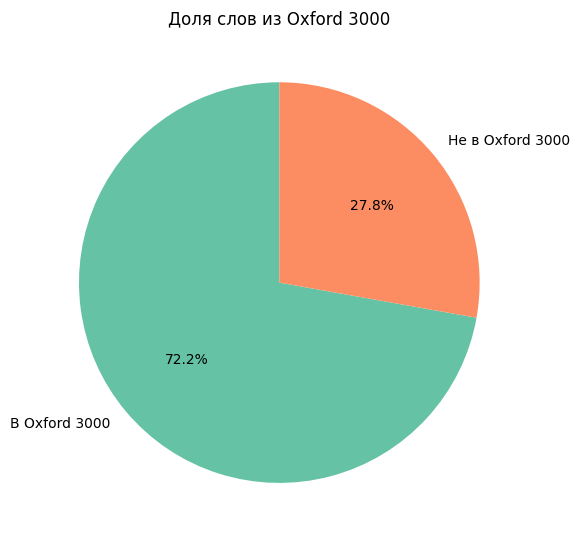

Статистика по лексике:
Всего уникальных слов: 187
Из них в Oxford 3000: 135 (72.2%)
Не входят в Oxford 3000: 52 (27.8%)

Частотная категория:
 - Высокая: 42 слов (22.5%)
 - Средняя: 52 слов (27.8%)
 - Низкая: 93 слов (49.7%)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка таблицы
df = pd.read_csv("spotlight_words_1detailed.csv")

# Убираем дубликаты по слову (лемме), чтобы не учитывать повторы из одной фразы
unique_words = df[['Слово', 'Входит в Oxford 3000', 'Частотная категория']].drop_duplicates()

# Подсчёт по Oxford 3000
oxford_counts = unique_words['Входит в Oxford 3000'].value_counts()

# Подсчёт по категориям
freq_cat_counts = unique_words['Частотная категория'].value_counts()

# === Круговая диаграмма: Oxford 3000 ===
plt.figure(figsize=(6, 6))
oxford_counts.plot.pie(
    autopct='%1.1f%%',
    labels=['В Oxford 3000', 'Не в Oxford 3000'],
    colors=['#66c2a5', '#fc8d62'],
    startangle=90
)
plt.title('Доля слов из Oxford 3000')
plt.ylabel("")
plt.tight_layout()
plt.show()

# === Текстовый вывод ===
total = len(unique_words)
in_oxford = oxford_counts.get("да", 0)
not_in_oxford = oxford_counts.get("нет", 0)

print("Статистика по лексике:")
print(f"Всего уникальных слов: {total}")
print(f"Из них в Oxford 3000: {in_oxford} ({in_oxford / total:.1%})")
print(f"Не входят в Oxford 3000: {not_in_oxford} ({not_in_oxford / total:.1%})")
print()
print("Частотная категория:")
for cat in ["высокая", "средняя", "низкая"]:
    count = freq_cat_counts.get(cat, 0)
    print(f" - {cat.capitalize()}: {count} слов ({count / total:.1%})")


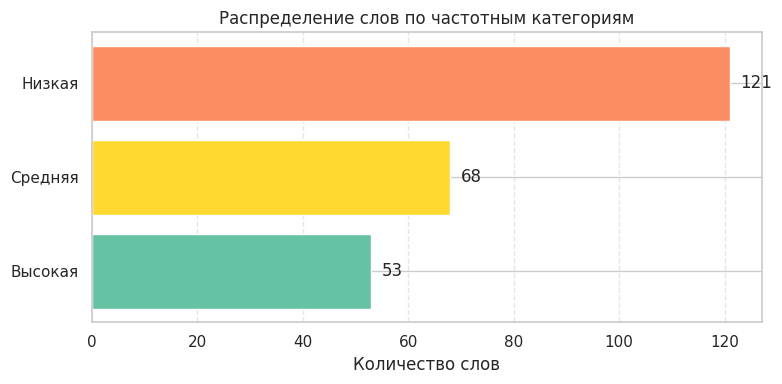

In [ ]:
import matplotlib.pyplot as plt

# Исходные данные
freq_data = {
    'Высокая': 53,
    'Средняя': 68,
    'Низкая': 121
}

# Цвета можно поменять при желании
colors = ['#66c2a5', '#ffd92f', '#fc8d62']

# Построение графика
plt.figure(figsize=(8, 4))
plt.barh(list(freq_data.keys()), list(freq_data.values()), color=colors)

# Подписи
plt.xlabel("Количество слов")
plt.title("Распределение слов по частотным категориям")
plt.grid(axis='x', linestyle='--', alpha=0.5)
for i, (label, value) in enumerate(freq_data.items()):
    plt.text(value + 2, i, str(value), va='center')

plt.tight_layout()
plt.show()


In [ ]:
# Первый список (исходный)
list1 = [
    "around", "away", "bare", "bathroom", "bear", "bees", "big", "book", "bowl", "cake", "candles",
    "cardboard", "cats", "chimney", "chocolate", "clean", "clear", "clips", "close", "clothes",
    "colour", "colours", "come", "count", "country", "crazy", "cruise", "cups", "day", "dear",
    "different", "dogs", "dont", "drinks", "dumplings", "eating", "especially", "everyone", "eye",
    "eyes", "fall", "family", "favourite", "feet", "flowers", "folks", "food", "foods", "footprints",
    "forget", "fruit", "fun", "garden", "give", "gnome", "good", "got", "ground", "grow", "hall",
    "hands", "hat", "havent", "home", "house", "im", "jelly", "kinds", "know", "larry", "lets",
    "lie", "lights", "like", "little", "long", "look", "lots", "lovely", "lulu", "magic", "many",
    "matchboxes", "matter", "medals", "meet", "nanny", "naughty", "nice", "oh", "ok", "open",
    "outside", "paint", "paper", "party", "people", "pick", "piece", "pip", "place", "plastic",
    "plate", "playing", "please", "plenty", "prayers", "put", "quick", "raining", "ready", "real",
    "red", "rhyme", "roll", "ruler", "sad", "sail", "sailing", "school", "seat", "see", "set",
    "shabby", "shine", "shop", "show", "showtime", "sing", "sister", "small", "smoke", "someone",
    "something", "south", "southwest", "spy", "squeak", "stairs", "starfish", "staying", "story",
    "string", "sun", "surprise", "table", "take", "tall", "teddy", "telephone", "thats", "therell",
    "today", "toothpick", "touch", "toy", "treehouse", "turn", "typical", "us", "vegetable", "wait",
    "wall", "want", "watch", "wearing", "welcome", "whats", "whos", "worry", "yes", "yoyo"
]

# Второй список (слова для исключения)
list2 = [
    "and", "bear", "big", "box", "cake", "candles", "chocolate", "colour", "country", "dow", "down",
    "eyes", "fish", "flowers", "garden", "go", "grandma", "grandpa", "hat", "he", "horse", "house",
    "in", "like", "magic", "mouse", "no", "off", "on", "open", "orange", "party", "sing", "small",
    "summer", "sun", "take", "teddy", "the", "to", "toy", "under", "up", "win", "yes", "your"
]

# Преобразуем второй список в множество
set2 = set(list2)

# Найдём пересечение
excluded_words = sorted(set(list1) & set2)

# Удалим пересекающиеся слова из первого списка
filtered_list = [word for word in list1 if word not in set2]

# Статистика
print(f"Всего слов в первом списке: {len(list1)}")
print(f"Исключено слов: {len(excluded_words)}")
print("Исключённые слова:")
print(", ".join(excluded_words))
print(f"Слов осталось после очистки: {len(filtered_list)}")

# (Опционально) Сохраняем очищенный список в файл
with open("filtered_words.txt", "w", encoding="utf-8") as f:
    for word in filtered_list:
        f.write(word + "\n")


Всего слов в первом списке: 172
Исключено слов: 23
Исключённые слова:
bear, big, cake, candles, chocolate, colour, country, eyes, flowers, garden, hat, house, like, magic, open, party, sing, small, sun, take, teddy, toy, yes
Слов осталось после очистки: 149


Сравнение активных и пассивных контекстов (Leksika)

In [ ]:
!pip install plotly

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from google.colab import files

print("Загрузите файл spotlight_vocab_result.csv")
uploaded = files.upload()
filename = list(uploaded.keys())[0]

#Чтение
df = pd.read_csv(filename)

#Отдельно фильтр актив и пассив
active_df = df[df['Тип'].str.lower() == 'активная'].sort_values(by='Кол-во вхождений', ascending=False).head(15)
passive_df = df[df['Тип'].str.lower() == 'пассивная'].sort_values(by='Кол-во вхождений', ascending=False).head(15)

fig = go.Figure()

fig.add_trace(go.Bar(
    x=active_df['Фраза'],
    y=active_df['Кол-во вхождений'],
    name='Активная лексика',
    marker_color='indianred'
))

fig.add_trace(go.Bar(
    x=passive_df['Фраза'],
    y=passive_df['Кол-во вхождений'],
    name='Пассивная лексика',
    marker_color='mediumseagreen'
))

fig.update_layout(
    title='Сравнение частотности активной и пассивной лексики',
    xaxis_title='Слова',
    yaxis_title='Частота',
    barmode='group',
    xaxis_tickangle=-45,
    template='plotly_white',
    width=1000,
    height=500
)

fig.show()
